# Importing Libraries

In [1]:
import pandas as pd, numpy as np                              # importing pandas and numpy libraries
import matplotlib.pyplot as plt, seaborn as sns               # importing libraries for visualizations

import warnings                                               # to suppress warnings
warnings.filterwarnings('ignore')

#pd.set_option('display.max_columns', None)                   # to view all the columns (without any restrictions)
#pd.set_option('display.max_rows', None)                      # to view all the rows (without any restrictions)
#pd.set_option('display.max_colwidth', None)                  # to view columns without any data hidden

from sklearn.model_selection import train_test_split          # to perform test train split
from sklearn.preprocessing import StandardScaler              # to perform scaling
from sklearn.preprocessing import MinMaxScaler                # to perform scaling
from imblearn.over_sampling import SMOTE                      # to handle data imbalance
from sklearn.decomposition import PCA                         # to perform PCA
from sklearn.decomposition import IncrementalPCA              # to perform PCA
from sklearn.metrics import confusion_matrix, accuracy_score  # Evaluation metrics
from sklearn.metrics import precision_score, recall_score     # precision and recall
from sklearn.linear_model import LogisticRegression           # logistic regression
from sklearn import metrics                                   # for logistic regression metrics
from sklearn.ensemble import RandomForestClassifier           # importing Random Forest Classifier
from sklearn.metrics import RocCurveDisplay                   # for plotting ROC curve
from sklearn.model_selection import GridSearchCV              # GridSearchCV for Hyperparameter Tuning

# Step 1: Data Preparation
- Loading the dataset
- Understanding the dataset
- Data cleaning like treating missing values and deriving new features

In [2]:
#Loading the dataset
telecom = pd.read_csv('telecom_churn_data.csv')       #name of the dataset given is telecom

In [3]:
#Understanding the data
telecom.shape

(99999, 226)

There are 99999 and 226 columns


In [4]:
telecom.head(30)                                      # viewing top 30 rows of the data

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.40,0.00,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.00,0.00,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.00,0.00,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.00,0.00,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.00,0.00,0.00,0.00
5,7000286308,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,50.258,...,0,NaN,NaN,NaN,NaN,1471,0.00,0.00,0.00,0.00
6,7001051193,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,429.023,...,0,NaN,NaN,NaN,NaN,1673,0.00,0.00,0.00,0.00
7,7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,1069.180,...,0,NaN,NaN,NaN,NaN,802,57.74,19.38,18.74,0.00
8,7001524846,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,378.721,...,0,NaN,1.0,1.0,NaN,315,21.03,910.65,122.16,0.00
9,7001864400,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,119.518,...,0,NaN,1.0,NaN,NaN,902,0.00,0.00,0.00,0.00


In [5]:
telecom.describe()                                    # viewing the statistics of numerical columns

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,...,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,7.001207e+09,109.0,0.0,0.0,0.0,282.987358,278.536648,279.154731,261.645069,132.395875,...,0.084581,0.914404,0.908764,0.890808,0.860968,1219.854749,68.170248,66.839062,60.021204,3.299373
std,6.956694e+05,0.0,0.0,0.0,0.0,328.439770,338.156291,344.474791,341.998630,297.207406,...,0.650457,0.279772,0.287950,0.311885,0.345987,954.733842,267.580450,271.201856,253.938223,32.408353
min,7.000000e+09,109.0,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000606e+09,109.0,0.0,0.0,0.0,93.411500,86.980500,84.126000,62.685000,7.380000,...,0.000000,1.000000,1.000000,1.000000,1.000000,467.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001205e+09,109.0,0.0,0.0,0.0,197.704000,191.640000,192.080000,176.849000,34.310000,...,0.000000,1.000000,1.000000,1.000000,1.000000,863.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001812e+09,109.0,0.0,0.0,0.0,371.060000,365.344500,369.370500,353.466500,118.740000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1807.500000,0.000000,0.000000,0.000000,0.000000
max,7.002411e+09,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,38805.617000,7376.710000,...,49.000000,1.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.210000,2618.570000


In [6]:
tel_col = list(telecom.columns)                       # Storing the columns to a list
tel_col

['mobile_number',
 'circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'arpu_9',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'onnet_mou_9',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'offnet_mou_9',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_ic_mou_9',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'roam_og_mou_9',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_t2c_mou_9',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'loc_og_mou_9',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2t_mou_9',
 's

In [7]:
telecom.info(verbose=True, show_counts=True)          # viewing the dataset for data types and nulls

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #    Column                    Non-Null Count  Dtype  
---   ------                    --------------  -----  
 0    mobile_number             99999 non-null  int64  
 1    circle_id                 99999 non-null  int64  
 2    loc_og_t2o_mou            98981 non-null  float64
 3    std_og_t2o_mou            98981 non-null  float64
 4    loc_ic_t2o_mou            98981 non-null  float64
 5    last_date_of_month_6      99999 non-null  object 
 6    last_date_of_month_7      99398 non-null  object 
 7    last_date_of_month_8      98899 non-null  object 
 8    last_date_of_month_9      98340 non-null  object 
 9    arpu_6                    99999 non-null  float64
 10   arpu_7                    99999 non-null  float64
 11   arpu_8                    99999 non-null  float64
 12   arpu_9                    99999 non-null  float64
 13   onnet_mou_6               96062 non-null  fl

In [8]:
telecom.isnull().sum()                                # null count for each column

mobile_number        0
circle_id            0
loc_og_t2o_mou    1018
std_og_t2o_mou    1018
loc_ic_t2o_mou    1018
                  ... 
aon                  0
aug_vbc_3g           0
jul_vbc_3g           0
jun_vbc_3g           0
sep_vbc_3g           0
Length: 226, dtype: int64

In [9]:
(telecom.isnull().sum()/telecom.shape[0]*100).sort_values(ascending = False)          # percentage of nulls in the dataset

arpu_3g_6            74.846748
night_pck_user_6     74.846748
total_rech_data_6    74.846748
arpu_2g_6            74.846748
max_rech_data_6      74.846748
                       ...    
max_rech_amt_7        0.000000
max_rech_amt_6        0.000000
total_rech_amt_9      0.000000
total_rech_amt_8      0.000000
sep_vbc_3g            0.000000
Length: 226, dtype: float64

In [10]:
# Columns with more than 40% nulls are assigned to a list 'high_nulls' (which will be same as columns with more than 70% nulls)
high_nulls = []
for i in tel_col:
    if telecom[i].isnull().sum()/telecom.shape[0]*100 > 40:
        high_nulls.append(i)
        
high_nulls

['date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'date_of_last_rech_data_9',
 'total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8',
 'total_rech_data_9',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'max_rech_data_9',
 'count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_2g_9',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'count_rech_3g_9',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8',
 'av_rech_amt_data_9',
 'arpu_3g_6',
 'arpu_3g_7',
 'arpu_3g_8',
 'arpu_3g_9',
 'arpu_2g_6',
 'arpu_2g_7',
 'arpu_2g_8',
 'arpu_2g_9',
 'night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'night_pck_user_9',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8',
 'fb_user_9']

In [11]:
len(high_nulls)                                             # count of columns withh null more than 40% or 70%

40

As there are many columns with dates and ids, these columns can't be used to build model. Hence these columns can be deleted

In [12]:
# Columns which are dates
date_col = ['last_date_of_month_6',                        
 'last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_9',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'date_of_last_rech_data_9',]

# Columns which are ids
id_col = ['mobile_number',
 'circle_id',]

In [13]:
telecom = telecom.drop(date_col + id_col, axis = 1)            # dropping columns which are date or id

Date and ID columns won't have any impact in the prediction as they are assigned randomly and are not related to any performance parameter

In [14]:
telecom.shape                                                  # reviewing the number of columns

(99999, 212)

#### Observation
Columns total_rech_data_6, max_rech_data_6, count_rech_2g_6, count_rech_3g_6, av_rech_amt_data_6, date_of_last_rech_data_6, arpu_3g_6, arpu_2g_6 have lot of nulls, however this might indicate that the user have not recharged with data pack. Hence these nulls can be imputed to 0. Same is applicable to these columns respective to other months.

However the date columns are already dropped.

In [15]:
# replacing nulls of data related columns to 0
telecom['total_rech_data_6'] = telecom['total_rech_data_6'].replace(np.NaN,0.0)
telecom['total_rech_data_7'] = telecom['total_rech_data_7'].replace(np.NaN,0.0)
telecom['total_rech_data_8'] = telecom['total_rech_data_8'].replace(np.NaN,0.0)
telecom['total_rech_data_9'] = telecom['total_rech_data_9'].replace(np.NaN,0.0)

telecom['max_rech_data_6'] = telecom['max_rech_data_6'].replace(np.NaN,0.0)
telecom['max_rech_data_7'] = telecom['max_rech_data_7'].replace(np.NaN,0.0)
telecom['max_rech_data_8'] = telecom['max_rech_data_8'].replace(np.NaN,0.0)
telecom['max_rech_data_9'] = telecom['max_rech_data_9'].replace(np.NaN,0.0)

telecom['count_rech_2g_6'] = telecom['count_rech_2g_6'].replace(np.NaN,0.0)
telecom['count_rech_2g_7'] = telecom['count_rech_2g_7'].replace(np.NaN,0.0)
telecom['count_rech_2g_8'] = telecom['count_rech_2g_8'].replace(np.NaN,0.0)
telecom['count_rech_2g_9'] = telecom['count_rech_2g_9'].replace(np.NaN,0.0)

telecom['count_rech_3g_6'] = telecom['count_rech_3g_6'].replace(np.NaN,0.0)
telecom['count_rech_3g_7'] = telecom['count_rech_3g_7'].replace(np.NaN,0.0)
telecom['count_rech_3g_8'] = telecom['count_rech_3g_8'].replace(np.NaN,0.0)
telecom['count_rech_3g_9'] = telecom['count_rech_3g_9'].replace(np.NaN,0.0)

telecom['av_rech_amt_data_6'] = telecom['av_rech_amt_data_6'].replace(np.NaN,0.0)
telecom['av_rech_amt_data_7'] = telecom['av_rech_amt_data_7'].replace(np.NaN,0.0)
telecom['av_rech_amt_data_8'] = telecom['av_rech_amt_data_8'].replace(np.NaN,0.0)
telecom['av_rech_amt_data_9'] = telecom['av_rech_amt_data_9'].replace(np.NaN,0.0)

telecom['arpu_3g_6'] = telecom['arpu_3g_6'].replace(np.NaN,0.0)
telecom['arpu_3g_7'] = telecom['arpu_3g_7'].replace(np.NaN,0.0)
telecom['arpu_3g_8'] = telecom['arpu_3g_8'].replace(np.NaN,0.0)
telecom['arpu_3g_9'] = telecom['arpu_3g_9'].replace(np.NaN,0.0)

telecom['arpu_2g_6'] = telecom['arpu_2g_6'].replace(np.NaN,0.0)
telecom['arpu_2g_7'] = telecom['arpu_2g_7'].replace(np.NaN,0.0)
telecom['arpu_2g_8'] = telecom['arpu_2g_8'].replace(np.NaN,0.0)
telecom['arpu_2g_9'] = telecom['arpu_2g_9'].replace(np.NaN,0.0)

In [16]:
# Deriving new columns like total_rech_amt_data_6 as
# total_rech_amt_data_6 = total_rech_data_6 * av_rech_amt_data_6
telecom['total_rech_amt_data_6'] = telecom.total_rech_data_6 * telecom.av_rech_amt_data_6
telecom['total_rech_amt_data_7'] = telecom.total_rech_data_7 * telecom.av_rech_amt_data_7
telecom['total_rech_amt_data_8'] = telecom.total_rech_data_8 * telecom.av_rech_amt_data_8
telecom['total_rech_amt_data_9'] = telecom.total_rech_data_9 * telecom.av_rech_amt_data_9

In [17]:
tel_col1 = list(telecom.columns)                       # Storing the updated columns to a list
tel_col1

['loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'arpu_9',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'onnet_mou_9',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'offnet_mou_9',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_ic_mou_9',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'roam_og_mou_9',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_t2c_mou_9',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'loc_og_mou_9',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_

In [18]:
# Revising high nulls - Columns with more than 40% nulls are assigned to a list 'high_nulls1' (which will be same as columns with more than 70% nulls)
high_nulls1 = []
for i in tel_col1:
    if telecom[i].isnull().sum()/telecom.shape[0]*100 > 40:
        high_nulls1.append(i)
        
high_nulls1

['night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'night_pck_user_9',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8',
 'fb_user_9']

At this point the columns with high nulls should not be dropped as the final dataset will be prepared after filtering the high-value customers

# Step 2: Filter high-value customers
- Derive a new feature for total recharge in month 6 and 7
- Filtering the dataset with 70th percentile of average recharge amount
- Dropping columns with high nulls or which are not adding value (like columns with unique values)
- Treating remaining nulls

In [19]:
telecom.head()                                                 # looking at the top 5 columns

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,...,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,total_rech_amt_data_9
0,0.0,0.0,0.0,197.385,214.816,213.803,21.100,NaN,NaN,0.00,...,NaN,968,30.4,0.0,101.20,3.58,252.0,252.0,252.0,0.0
1,0.0,0.0,0.0,34.047,355.074,268.321,86.285,24.11,78.68,7.68,...,NaN,1006,0.0,0.0,0.00,0.00,0.0,154.0,100.0,0.0
2,0.0,0.0,0.0,167.690,189.058,210.226,290.714,11.54,55.24,37.26,...,1.0,1103,0.0,0.0,4.17,0.00,0.0,0.0,0.0,46.0
3,0.0,0.0,0.0,221.338,251.102,508.054,389.500,99.91,54.39,310.98,...,NaN,2491,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,261.636,309.876,238.174,163.426,50.31,149.44,83.89,...,NaN,1526,0.0,0.0,0.00,0.00,56.0,0.0,0.0,0.0


In [20]:
list(telecom.columns)                                          # Getting the list of the columns

['loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'arpu_9',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'onnet_mou_9',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'offnet_mou_9',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_ic_mou_9',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'roam_og_mou_9',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_t2c_mou_9',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'loc_og_mou_9',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_

In [21]:
# Derive new feature for total recharge
telecom['total_rech_6'] = telecom['total_rech_amt_data_6'] + telecom['total_rech_amt_6']
telecom['total_rech_7'] = telecom['total_rech_amt_data_7'] + telecom['total_rech_amt_7']
telecom['total_rech_8'] = telecom['total_rech_amt_data_8'] + telecom['total_rech_amt_8']

telecom['avg_rech_6_7'] = (telecom['total_rech_6'] + telecom['total_rech_7'])/2    # total average recharge for 6th and 7th month

In [22]:
# 70th percentile of avergae recharge amount for 6th and 7th month
print('The 70th percentile of average recharge amount for 6th and 7th month =',telecom.avg_rech_6_7.quantile(0.7))

The 70th percentile of average recharge amount for 6th and 7th month = 478.0


In [23]:
high_value = telecom[telecom.avg_rech_6_7 >= telecom.avg_rech_6_7.quantile(0.7)]  # new dataframe to filter high value customer

In [24]:
high_value.shape                                                               # looking at the shape of the dataframe

(30001, 220)

There are 30001 rows after filtering high value customers

In [25]:
high_value.head()                                                                # looking at the top 5 rows for new dataframe

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,...,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,total_rech_amt_data_9,total_rech_6,total_rech_7,total_rech_8,avg_rech_6_7
0,0.0,0.0,0.0,197.385,214.816,213.803,21.100,NaN,NaN,0.00,...,101.20,3.58,252.0,252.0,252.0,0.0,614.0,504.0,504.0,559.0
7,0.0,0.0,0.0,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,...,18.74,0.00,0.0,0.0,0.0,0.0,1580.0,790.0,3638.0,1185.0
8,0.0,0.0,0.0,378.721,492.223,137.362,166.787,413.69,351.03,35.08,...,122.16,0.00,0.0,354.0,207.0,0.0,437.0,955.0,327.0,696.0
21,0.0,0.0,0.0,514.453,597.753,637.760,578.596,102.41,132.11,85.14,...,0.00,0.00,0.0,0.0,0.0,0.0,600.0,680.0,718.0,640.0
23,0.0,0.0,0.0,74.350,193.897,366.966,811.480,48.96,50.66,33.58,...,0.00,0.00,0.0,712.0,540.0,252.0,0.0,1166.0,979.0,583.0


The indexes needs to be reset for new dataframe

In [26]:
high_value.reset_index(drop=True, inplace=True)             # reset the index of new dataframe

In [27]:
high_value.head()                                           # looking at the top 5 rows for new dataframe

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,...,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,total_rech_amt_data_9,total_rech_6,total_rech_7,total_rech_8,avg_rech_6_7
0,0.0,0.0,0.0,197.385,214.816,213.803,21.100,NaN,NaN,0.00,...,101.20,3.58,252.0,252.0,252.0,0.0,614.0,504.0,504.0,559.0
1,0.0,0.0,0.0,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,...,18.74,0.00,0.0,0.0,0.0,0.0,1580.0,790.0,3638.0,1185.0
2,0.0,0.0,0.0,378.721,492.223,137.362,166.787,413.69,351.03,35.08,...,122.16,0.00,0.0,354.0,207.0,0.0,437.0,955.0,327.0,696.0
3,0.0,0.0,0.0,514.453,597.753,637.760,578.596,102.41,132.11,85.14,...,0.00,0.00,0.0,0.0,0.0,0.0,600.0,680.0,718.0,640.0
4,0.0,0.0,0.0,74.350,193.897,366.966,811.480,48.96,50.66,33.58,...,0.00,0.00,0.0,712.0,540.0,252.0,0.0,1166.0,979.0,583.0


In [28]:
(high_value.isnull().sum()/high_value.shape[0]*100).sort_values(ascending = False)   # arranging the columns based on the null percentage

fb_user_9           49.268358
night_pck_user_9    49.268358
fb_user_8           46.825106
night_pck_user_8    46.825106
fb_user_6           44.148528
                      ...    
count_rech_2g_6      0.000000
max_rech_data_9      0.000000
max_rech_data_8      0.000000
max_rech_data_7      0.000000
avg_rech_6_7         0.000000
Length: 220, dtype: float64

In [29]:
# Revising high nulls - Columns with more than 40% nulls are assigned to a list 'high_nulls2' (which will be same as columns with more than 70% nulls)
high_nulls2 = []
for i in list(high_value.columns):
    if high_value[i].isnull().sum()/high_value.shape[0]*100 > 40:
        high_nulls2.append(i)
        
high_nulls2

['night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'night_pck_user_9',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8',
 'fb_user_9']

In [30]:
high_value = high_value.drop(high_nulls2, axis = 1)                  # dropping columns with high nulls

In [31]:
high_value.shape                                                     # Reviewing the rows and column counts

(30001, 212)

In [32]:
list(high_value.columns)                                             # Reviewing the list of the columns

['loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'arpu_9',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'onnet_mou_9',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'offnet_mou_9',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_ic_mou_9',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'roam_og_mou_9',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_t2c_mou_9',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'loc_og_mou_9',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_

In [33]:
# columns with only 1 unique value
unique_cols = []

for i in list(high_value.columns):
    if high_value[i].nunique() == 1:
        unique_cols.append(i)
        
unique_cols

['loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_og_t2c_mou_9',
 'std_ic_t2o_mou_6',
 'std_ic_t2o_mou_7',
 'std_ic_t2o_mou_8',
 'std_ic_t2o_mou_9']

Columns with only 1 unique value won't have any contribution in the prediction. Hence these columns can be dropped

In [34]:
# dropping columns with only 1 unique value
high_value = high_value.drop(unique_cols, axis = 1)
high_value.shape

(30001, 201)

In [35]:
# dropping columns which were used to derive new features
# Here are derived columns
# telecom['total_rech_amt_data_6'] = telecom.total_rech_data_6 * telecom.av_rech_amt_data_6
# telecom['total_rech_amt_data_7'] = telecom.total_rech_data_7 * telecom.av_rech_amt_data_7
# telecom['total_rech_amt_data_8'] = telecom.total_rech_data_8 * telecom.av_rech_amt_data_8
# telecom['total_rech_amt_data_9'] = telecom.total_rech_data_9 * telecom.av_rech_amt_data_9
# telecom['total_rech_6'] = telecom['total_rech_amt_data_6'] + telecom['total_rech_amt_6']
# telecom['total_rech_7'] = telecom['total_rech_amt_data_7'] + telecom['total_rech_amt_7']
# telecom['avg_rech_6_7'] = (telecom['total_rech_6'] + telecom['total_rech_7'])/2 

high_value = high_value.drop(['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9', 
                              'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9', 
                              'total_rech_amt_data_6', 'total_rech_amt_6', 'total_rech_amt_data_7', 'total_rech_amt_7', 
                              'total_rech_6', 'total_rech_7'], axis = 1)

In [36]:
# Rechecking the nulls
nulls = []
for i in list(high_value.columns):
    if high_value[i].isnull().sum()/high_value.shape[0]*100 > 0:
        nulls.append(i)
        
nulls

['onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'onnet_mou_9',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'offnet_mou_9',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_ic_mou_9',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'roam_og_mou_9',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_t2c_mou_9',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'loc_og_mou_9',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_t2f_mou_9',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'std_og_mou_9',


In [37]:
high_value = high_value.fillna(high_value.median())                      # Replacing the nulls with medians

As the columns with null > 40% were already dropped, the remaining columns with less nulls needed to be treated. Hence these nulls are replaced with their column median values.

In [38]:
(high_value.isnull().sum()/high_value.shape[0]*100).sort_values(ascending = False).head(50)  # CHecking once again if there are any null remaining

arpu_6                0.0
max_rech_amt_8        0.0
ic_others_9           0.0
total_rech_num_6      0.0
total_rech_num_7      0.0
total_rech_num_8      0.0
total_rech_num_9      0.0
total_rech_amt_8      0.0
total_rech_amt_9      0.0
max_rech_amt_6        0.0
max_rech_amt_7        0.0
max_rech_amt_9        0.0
count_rech_2g_8       0.0
last_day_rch_amt_6    0.0
last_day_rch_amt_7    0.0
last_day_rch_amt_8    0.0
last_day_rch_amt_9    0.0
max_rech_data_6       0.0
max_rech_data_7       0.0
max_rech_data_8       0.0
max_rech_data_9       0.0
count_rech_2g_6       0.0
ic_others_8           0.0
ic_others_7           0.0
ic_others_6           0.0
isd_ic_mou_9          0.0
std_ic_t2f_mou_6      0.0
std_ic_t2f_mou_7      0.0
std_ic_t2f_mou_8      0.0
std_ic_t2f_mou_9      0.0
std_ic_mou_6          0.0
std_ic_mou_7          0.0
std_ic_mou_8          0.0
std_ic_mou_9          0.0
total_ic_mou_6        0.0
total_ic_mou_7        0.0
total_ic_mou_8        0.0
total_ic_mou_9        0.0
spl_ic_mou_6

At this point, the dataset doesn't contain any column with nulls. All the nulls are treated by either dropping the column with high nulls (>40%) or by imputing with median values.

# Step 3: Tag Churners
- Tag Churners based on data from 9th month
- Dropping columns which are providing data for 9th month
- Imbalance analysis
- Deriving new features

Columns to use for identifying churners:
- total_ic_mou_9
- total_og_mou_9
- vol_2g_mb_9
- vol_3g_mb_9 

In [39]:
churner_cols = ['total_ic_mou_9', 'total_og_mou_9', 'vol_2g_mb_9', 'vol_3g_mb_9']  # list of columns to use to predict churners

In [40]:
high_value[churner_cols].isnull().sum()                                            # checking for nulls for churner columns

total_ic_mou_9    0
total_og_mou_9    0
vol_2g_mb_9       0
vol_3g_mb_9       0
dtype: int64

New column can be created as 'churned' which will be 0 or 1 based on value (zero or non-zero) of churner_cols

In [41]:
# creating new feature churned 
high_value['churned'] = high_value.apply(lambda x: 1 if (x.total_ic_mou_9 == 0 and 
                                                         x.total_og_mou_9 == 0 and 
                                                         x.vol_2g_mb_9 == 0 and 
                                                         x.vol_2g_mb_9 == 0) else 0, axis = 1)

New column 'churned' is created based on the 4 columns which basically indicates the uses in 9th month.

In [42]:
high_value.head()                                          # first 5 rows of the dataset

,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,...,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_8,total_rech_amt_data_9,total_rech_8,avg_rech_6_7,churned
0,197.385,214.816,213.803,21.100,88.06,86.885,0.00,65.34,229.635,227.12,...,968,30.40,0.00,101.20,3.58,252.0,0.0,504.0,559.0,1
1,1069.180,1349.850,3171.480,500.000,57.84,54.680,52.29,65.34,453.430,567.16,...,802,57.74,19.38,18.74,0.00,0.0,0.0,3638.0,1185.0,1
2,378.721,492.223,137.362,166.787,413.69,351.030,35.08,33.46,94.660,80.63,...,315,21.03,910.65,122.16,0.00,207.0,0.0,327.0,696.0,0
3,514.453,597.753,637.760,578.596,102.41,132.110,85.14,161.63,757.930,896.68,...,720,0.00,0.00,0.00,0.00,0.0,0.0,718.0,640.0,0
4,74.350,193.897,366.966,811.480,48.96,50.660,33.58,15.74,85.410,89.36,...,604,40.45,51.86,0.00,0.00,540.0,252.0,979.0,583.0,0


In [43]:
# creating copy of dataset for EDA
high_value1 = high_value

Although some columns are dropped, but it is important to study the behaviour of some of these dropped columns. Hence a copy of the dataset is created just to do EDA.

In [44]:
# renaming 'vbc' column to month numbers
high_value = high_value.rename(columns = {'jun_vbc_3g': 'vbc_3g_6', 
                             'jul_vbc_3g': 'vbc_3g_7', 
                             'aug_vbc_3g': 'vbc_3g_8', 
                             'sep_vbc_3g': 'vbc_3g_9'})


In [45]:
# Columns with '_9' in end
col_9 = [i for i in high_value.columns if '_9' in i]

In [46]:
col_9                                                  # list of columns for 9th month

['arpu_9',
 'onnet_mou_9',
 'offnet_mou_9',
 'roam_ic_mou_9',
 'roam_og_mou_9',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_9',
 'loc_og_mou_9',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_9',
 'std_og_mou_9',
 'isd_og_mou_9',
 'spl_og_mou_9',
 'og_others_9',
 'total_og_mou_9',
 'loc_ic_t2t_mou_9',
 'loc_ic_t2m_mou_9',
 'loc_ic_t2f_mou_9',
 'loc_ic_mou_9',
 'std_ic_t2t_mou_9',
 'std_ic_t2m_mou_9',
 'std_ic_t2f_mou_9',
 'std_ic_mou_9',
 'total_ic_mou_9',
 'spl_ic_mou_9',
 'isd_ic_mou_9',
 'ic_others_9',
 'total_rech_num_9',
 'total_rech_amt_9',
 'max_rech_amt_9',
 'last_day_rch_amt_9',
 'max_rech_data_9',
 'count_rech_2g_9',
 'count_rech_3g_9',
 'vol_2g_mb_9',
 'vol_3g_mb_9',
 'arpu_3g_9',
 'arpu_2g_9',
 'monthly_2g_9',
 'sachet_2g_9',
 'monthly_3g_9',
 'sachet_3g_9',
 'vbc_3g_9',
 'total_rech_amt_data_9']

In [47]:
# removal of all the attributes ending with '_9'
high_value = high_value.drop(col_9, axis = 1)

Since the data of 9th month can't be used for predictions, these columns can be dropped.

In [48]:
high_value.shape

(30001, 141)

There are 141 columns remaining

In [49]:
# Imbalance analysis of the Target column 'churned'
high_value.churned.value_counts(normalize = True)*100

0    91.536949
1     8.463051
Name: churned, dtype: float64

91.54% of the data are for class not churned and only about 8.46% customer are high valued who churned

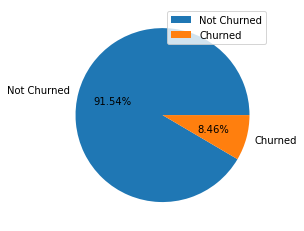

In [50]:
# plotting pie chart to represent the imbalance percentage
plt.pie(x = high_value.churned.value_counts(), autopct='%.2f%%', labels = ['Not Churned', 'Churned'])
plt.legend()
plt.show()

In [51]:
# deriving new features
# incoming calls:
ic = [i for i in high_value.columns if 'ic' in i and 'mou' in i]
ic = ic + ['ic_others_6','ic_others_7','ic_others_8']
high_value['ic'] = high_value[ic].sum(axis = 1)

# outgoing calls
og = [i for i in high_value.columns if 'og' in i and 'mou' in i]
og = og + ['og_others_6','og_others_7','og_others_8']
high_value['og'] = high_value[og].sum(axis = 1)

# data uses
vol = [i for i in high_value.columns if 'vol' in i and 'mb' in i]
high_value['vol'] = high_value[vol].sum(axis = 1)

#offnet and onnet mou
mou = [i for i in high_value.columns if 'net' in i and 'mou' in i]
high_value['mou'] = high_value[mou].sum(axis = 1)

# Recharge counts
rech_cnt = [i for i in high_value.columns if 'rech' in i and 'count' in i]
high_value['rech_cnt'] = high_value[rech_cnt].sum(axis = 1)

# monthly data uses
mon_data = [i for i in high_value.columns if 'monthly' in i and ('2g' in i or '3g' in i)]
high_value['mon_data'] = high_value[mon_data].sum(axis = 1)

# max recharge amount
max_rech_amt = [i for i in high_value.columns if 'rech' in i and 'max' in i]
high_value['max_rech_amt'] = high_value[max_rech_amt].sum(axis = 1)

high_value = high_value.drop(high_value[ic + og + vol + mou + rech_cnt + max_rech_amt], axis = 1)

# Step 4: EDA

In [52]:
# Column categorization
cols_mon6 = [i for i in high_value.columns if '_6' in i]
cols_mon7 = [i for i in high_value.columns if '_7' in i]
cols_mon8 = [i for i in high_value.columns if '_8' in i]

In [53]:
high_value.head()                                        # first 5 rows of the dataset

,arpu_6,arpu_7,arpu_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,...,total_rech_8,avg_rech_6_7,churned,ic,og,vol,mou,rech_cnt,mon_data,max_rech_amt
0,197.385,214.816,213.803,4,3,2,252,252,252,252,...,504.0,559.0,1,565.36,620.23,381.14,631.70,3.0,3,1512.0
1,1069.180,1349.850,3171.480,5,5,7,3638,0,0,779,...,3638.0,1185.0,1,4826.38,4393.86,0.00,1511.31,0.0,0,3950.0
2,378.721,492.223,137.362,19,21,14,120,50,0,10,...,327.0,696.0,0,446.65,3331.57,1118.92,1111.57,5.0,1,451.0
3,514.453,597.753,637.760,22,26,27,718,30,20,50,...,718.0,640.0,0,1799.99,8872.92,0.00,2957.66,0.0,0,150.0
4,74.350,193.897,366.966,3,5,4,439,0,179,0,...,979.0,583.0,0,1871.88,1541.51,1609.50,513.86,4.0,3,716.0


#### Analyzing average revenue per user with churn

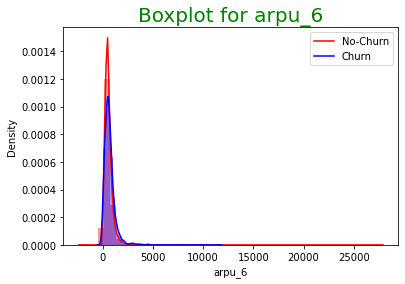

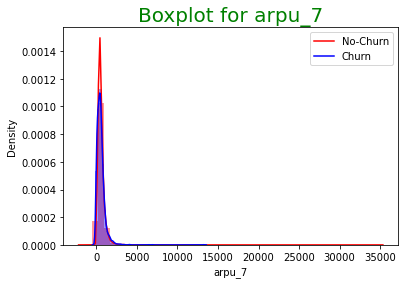

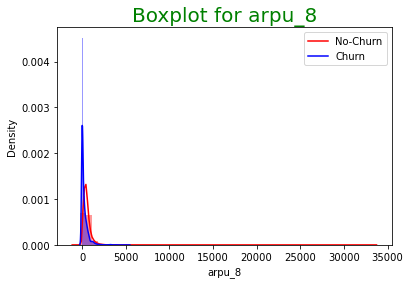

In [54]:
# Distribution Plot
for i in ['arpu_6', 'arpu_7', 'arpu_8']:
    plt.title(f"Boxplot for {i}", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
    ax = sns.distplot(high_value[high_value['churned'] == 0][i], color = 'Red')
    ax = sns.distplot(high_value[high_value['churned'] == 1][i], color = 'Blue')
    ax.legend(["No-Churn","Churn"])
    plt.show()

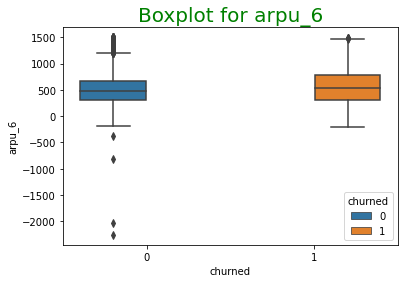

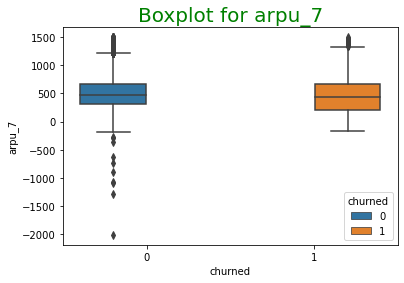

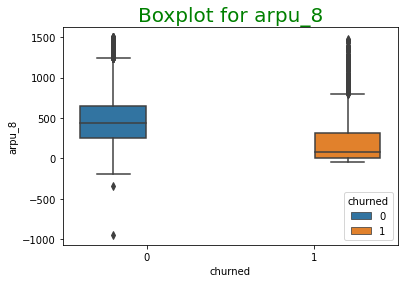

In [55]:
# Box plot
for i in ['arpu_6', 'arpu_7', 'arpu_8']:
    plt.title(f"Boxplot for {i}", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
    sns.boxplot(x = 'churned', y = high_value[high_value[i] < 1500][i], data=high_value, hue = 'churned')
    plt.show()

Inferences:
- For 'good' phase, churned and non-churned customer generated somewhat equal revenue (considering median values)
- For 'action' phase however, churned customers seem to drop the uses and hence the revenue generated is lesser
- For all the phases, the non-churned customers seem to generate similar revenue

In [56]:
# Outlier capping for values greater than 1500
for i in ['arpu_6', 'arpu_7', 'arpu_8']:
    high_value.loc[high_value[i]>1500,[i]] = 1500
    high_value.loc[high_value[i]<0,[i]] = 0

In [57]:
high_value['arpu_7'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .97, .98, .99])

count    30001.000000
mean       542.554488
std        331.850756
min          0.000000
5%         114.273000
25%        309.826000
50%        480.943000
75%        698.315000
90%        995.859000
95%       1261.272000
97%       1472.525000
98%       1500.000000
99%       1500.000000
max       1500.000000
Name: arpu_7, dtype: float64

Capping the outlier data for these features to 1500 on higher side and 0 on lower side

#### Analyzing onnet and offnet minutes of uses with churn

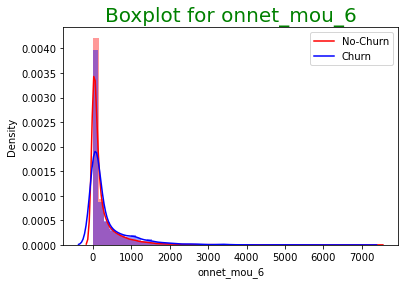

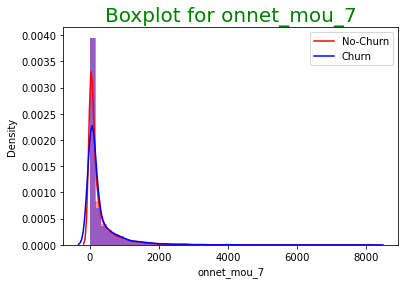

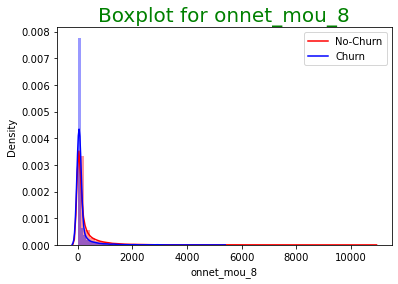

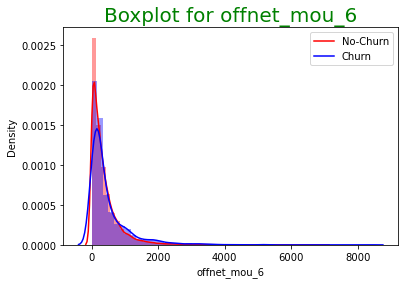

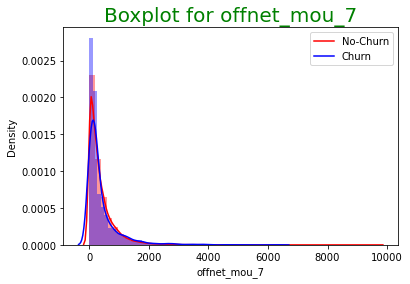

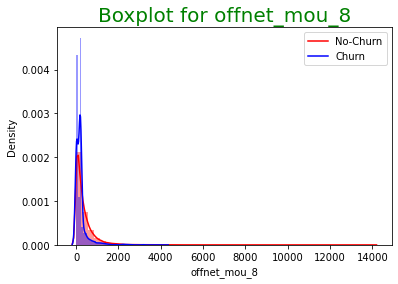

In [58]:
# Distribution Plot
for i in ['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8']:
    plt.title(f"Boxplot for {i}", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
    ax = sns.distplot(high_value1[high_value1['churned'] == 0][i], color = 'Red')
    ax = sns.distplot(high_value1[high_value1['churned'] == 1][i], color = 'Blue')
    ax.legend(["No-Churn","Churn"])
    plt.show()

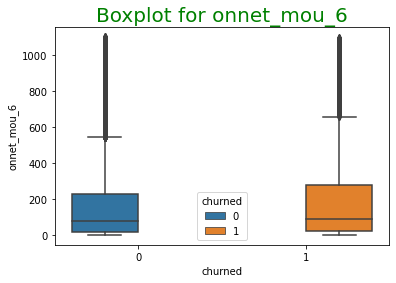

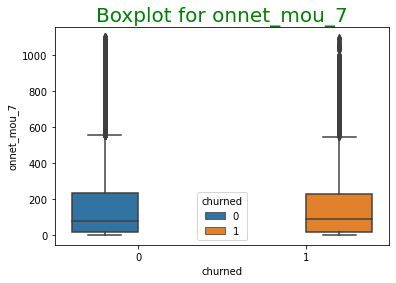

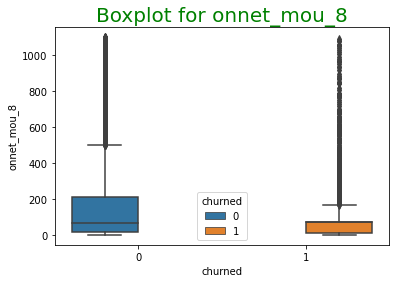

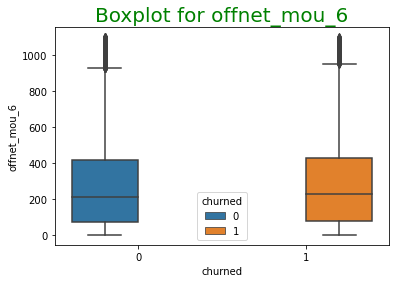

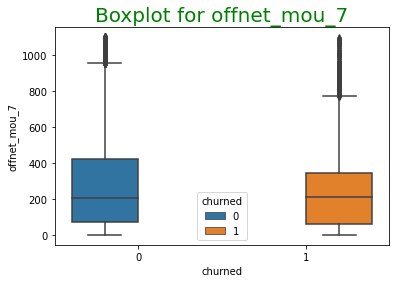

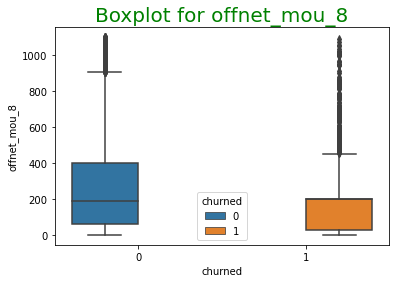

In [59]:
# Box plot
for i in ['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8']:
    plt.title(f"Boxplot for {i}", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
    sns.boxplot(x = 'churned', y = high_value1[high_value1[i] < 1100][i], data=high_value1, hue = 'churned')
    plt.show()

Inferences:
- For all the phases, the non-churned customers seem to have similar minutes of usage for onnet and offnet
- For churned customers, there is slow decline which can be observed in both offnet and onnet
    * This decline can be obsevred from month 6 to month 7 and then month 7 to month 8
- This indicates that users usually started experiencing issues and slowly reduced usage. The action phase would have been a good time to take actions to prevent customer churning

#### Analyzing outgoing and incoming calls minutes of uses with churn

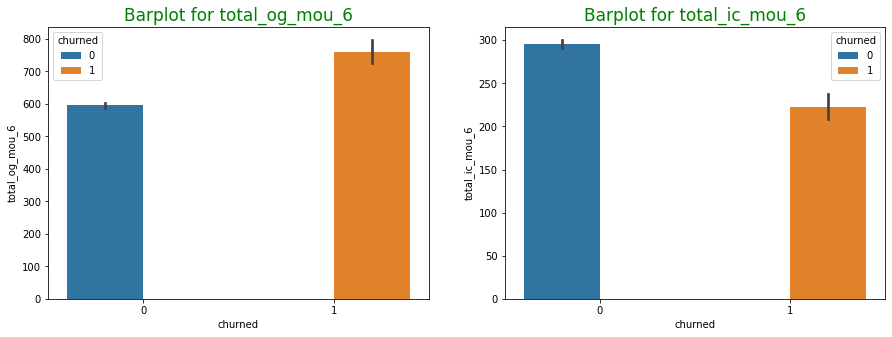

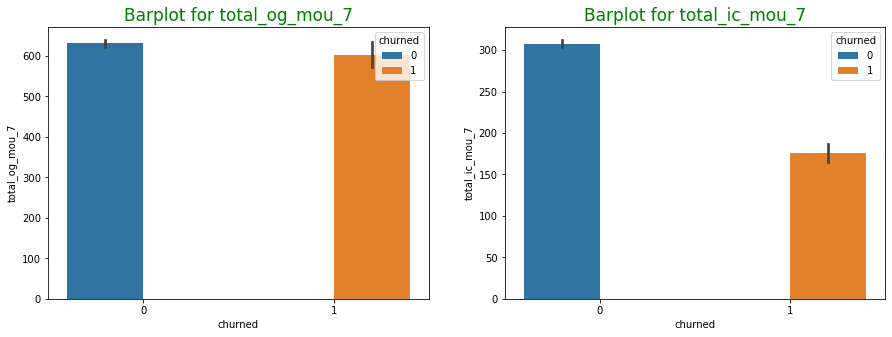

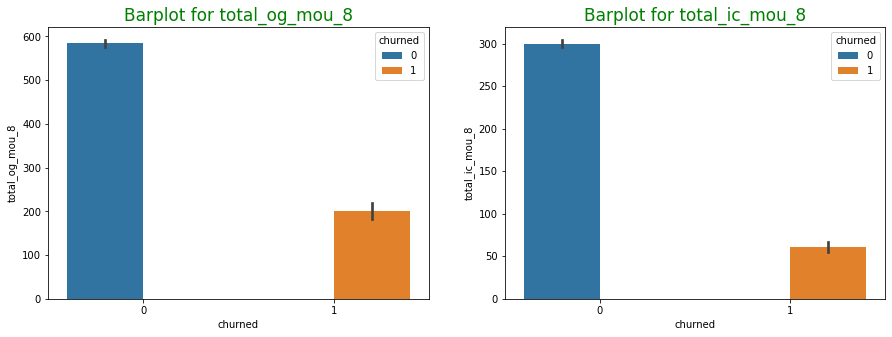

In [60]:
# Creating new column categories for incoming and outgoing calls, to be used for barplot and comparision
og_cols = ['total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8'] # total outgoing calls
in_cols = ['total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8'] # total incoming calls
in_og = [('total_og_mou_6', 'total_ic_mou_6'), ('total_og_mou_7', 'total_ic_mou_7'), ('total_og_mou_8', 'total_ic_mou_8')]

# use of for loop to plot bar plot   
for i, j in in_og:
    plt.figure(figsize = [15,5]) 
    plt.subplot(1,2,1)
    sns.barplot(y = high_value1[i], x = high_value1['churned'], hue = high_value1['churned'])
    plt.title(f'Barplot for {i}', fontdict={'fontsize': 17, 'fontweight' : 5, 'color' : 'Green'})
    plt.subplot(1,2,2)
    sns.barplot(y = high_value1[j], x = high_value1['churned'], hue = high_value1['churned'])
    plt.title(f'Barplot for {j}', fontdict={'fontsize': 17, 'fontweight' : 5, 'color' : 'Green'})
    plt.show()

Inferences:
- For all the phases, the non-churned customers seem to have similar minutes of usage for outgoing and incoming
- For churned customers, there is slow decline which can be observed in both outgoing and incoming
    * This decline can be obsevred from month 6 to month 7 and then month 7 to month 8
- This indicates that users usually started experiencing issues and slowly reduced usage. The action phase would have been a good time to take actions to prevent customer churning
- In general the outgoing calls minutes usage are higher than incoming call minutes usage

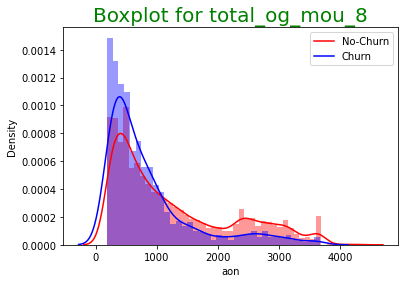

In [61]:
# aon distribution of age on network
plt.title(f"Boxplot for {i}", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
ax = sns.distplot(high_value[high_value['churned'] == 0]['aon'], color = 'Red')
ax = sns.distplot(high_value[high_value['churned'] == 1]['aon'], color = 'Blue')
ax.legend(["No-Churn","Churn"])
plt.show()

Inference:
- There is slighlty more user density of customer who churned with lower Age on network
- While customers with higher Age on network seems to be slighly higher in numer (density)
- This is a predictable behavior as the customers who have been there for long time with the network may seem to build trust on the service provider and might want to give more chances to the network
- **Company should provide some privilege packages to these customers who are loyal**

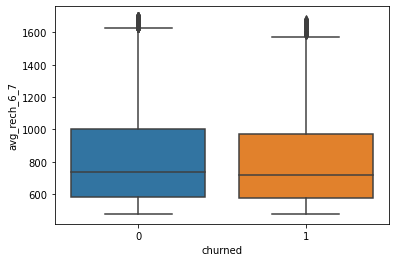

In [62]:
# boxplot for avergae recharge in 6th and 7th month
sns.boxplot(y = high_value[high_value['avg_rech_6_7']<=1700]['avg_rech_6_7'], x = high_value['churned'])
plt.show()
# total recharge num
# total recharge amount data
# total recharge data num

Inference:
- There is no much difference in the recharge pattern based on churned and non-churned classes, with slight lesser average recarge amount for churned class

In [63]:
# Outlier capping for value greater than 1700
high_value.loc[high_value['avg_rech_6_7']>1700,['avg_rech_6_7']] = 1700

In [64]:
high_value['avg_rech_6_7'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .97, .98, .99])

count    30001.000000
mean       942.585782
std        409.286320
min        478.000000
5%         500.000000
25%        603.000000
50%        800.000000
75%       1208.000000
90%       1700.000000
95%       1700.000000
97%       1700.000000
98%       1700.000000
99%       1700.000000
max       1700.000000
Name: avg_rech_6_7, dtype: float64

Values greater than 1700 capped to 1700

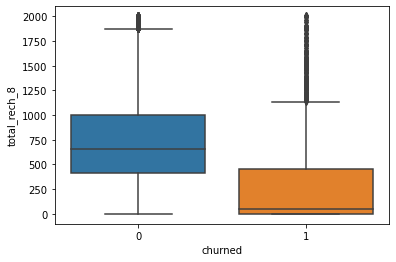

In [65]:
# boxplot for total recharge in 8th month
sns.boxplot(y = high_value[high_value['total_rech_8']<=2000]['total_rech_8'], x = high_value['churned'])
plt.show()

Inference:
- Churned class clearly shows significant drop in the total recharge amount for month 8
- This could be used as indicator of churner and could be used for taking appropriate action

In [66]:
# Outlier capping for value greater than 2000
high_value.loc[high_value['total_rech_8']>2000,['total_rech_8']] = 2000

In [67]:
high_value['total_rech_8'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .97, .98, .99])

count    30001.000000
mean       825.182324
std        597.647743
min          0.000000
5%           0.000000
25%        396.000000
50%        688.000000
75%       1152.000000
90%       2000.000000
95%       2000.000000
97%       2000.000000
98%       2000.000000
99%       2000.000000
max       2000.000000
Name: total_rech_8, dtype: float64

Values more than 2000 are capped to 2000

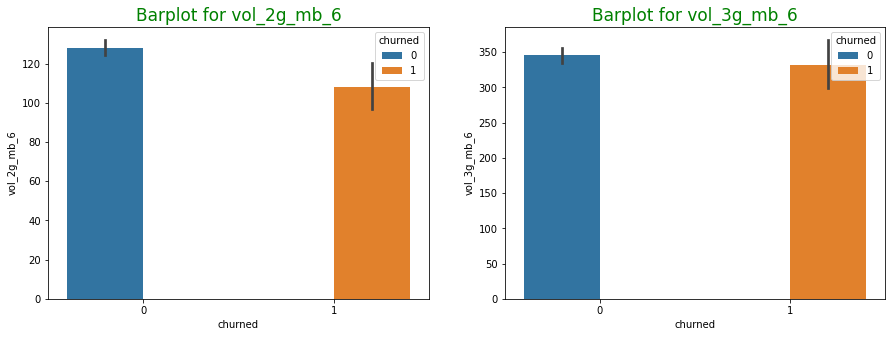

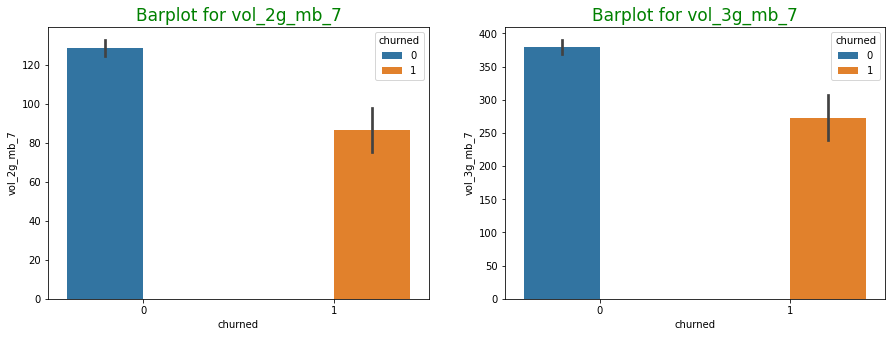

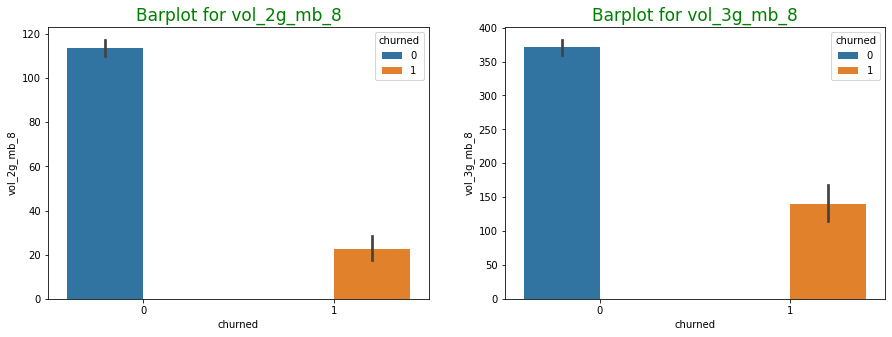

In [68]:
# barplot for data volume for 2g and 3g
for i, j in [('vol_2g_mb_6', 'vol_3g_mb_6'), ('vol_2g_mb_7', 'vol_3g_mb_7'), ('vol_2g_mb_8', 'vol_3g_mb_8')]:
    plt.figure(figsize = [15,5]) 
    plt.subplot(1,2,1)
    sns.barplot(y = high_value1[i], x = high_value1['churned'], hue = high_value1['churned'])
    plt.title(f'Barplot for {i}', fontdict={'fontsize': 17, 'fontweight' : 5, 'color' : 'Green'})
    plt.subplot(1,2,2)
    sns.barplot(y = high_value1[j], x = high_value1['churned'], hue = high_value1['churned'])
    plt.title(f'Barplot for {j}', fontdict={'fontsize': 17, 'fontweight' : 5, 'color' : 'Green'})
    plt.show()

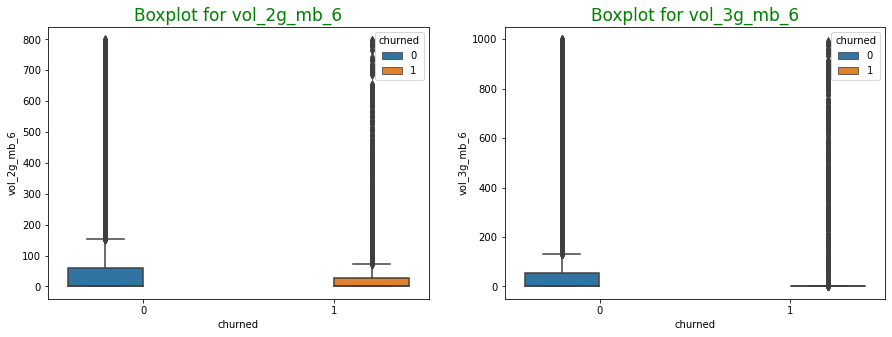

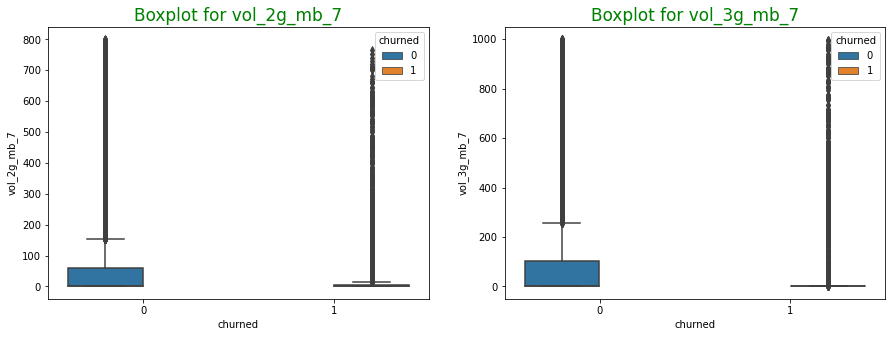

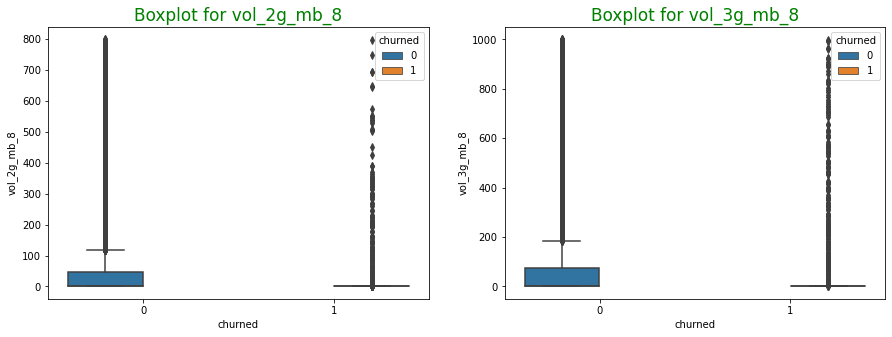

In [69]:
# boxplot for data volume for 2g and 3g
for i, j in [('vol_2g_mb_6', 'vol_3g_mb_6'), ('vol_2g_mb_7', 'vol_3g_mb_7'), ('vol_2g_mb_8', 'vol_3g_mb_8')]:
    plt.figure(figsize = [15,5]) 
    plt.subplot(1,2,1)
    sns.boxplot(y = high_value1[high_value1[i]<=800][i], x = high_value1['churned'], hue = high_value1['churned'])
    plt.title(f'Boxplot for {i}', fontdict={'fontsize': 17, 'fontweight' : 5, 'color' : 'Green'})
    plt.subplot(1,2,2)
    sns.boxplot(y = high_value1[high_value1[j]<=1000][j], x = high_value1['churned'], hue = high_value1['churned'])
    plt.title(f'Boxplot for {j}', fontdict={'fontsize': 17, 'fontweight' : 5, 'color' : 'Green'})
    plt.show()

Inference:
- 3g data uses are higher than 2g data uses 
- Churned class clearly shows significant drop in 2g and 3g data uses from good phase to action phase
- Non-churned class shows similar uses behaviour in 2g and 3g data uses from good phase and action phase
- This could be used as indicator of churner and could be used for taking appropriate action in the begining of action phase

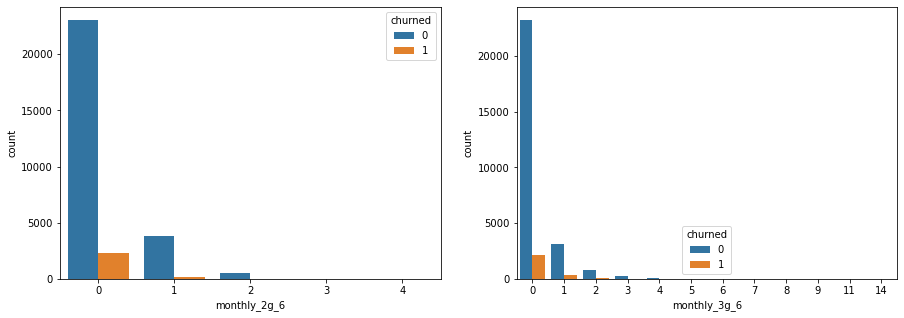

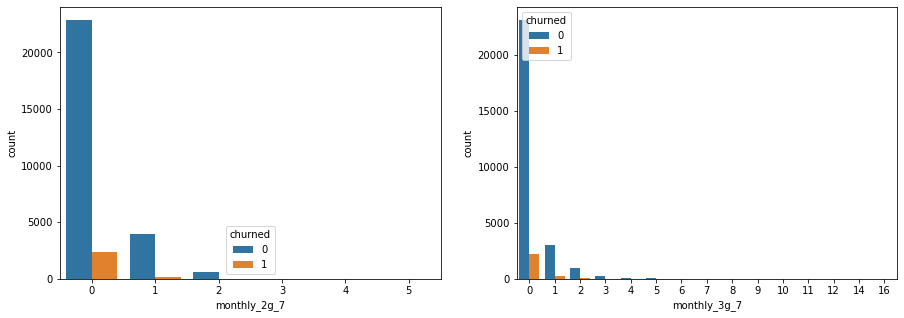

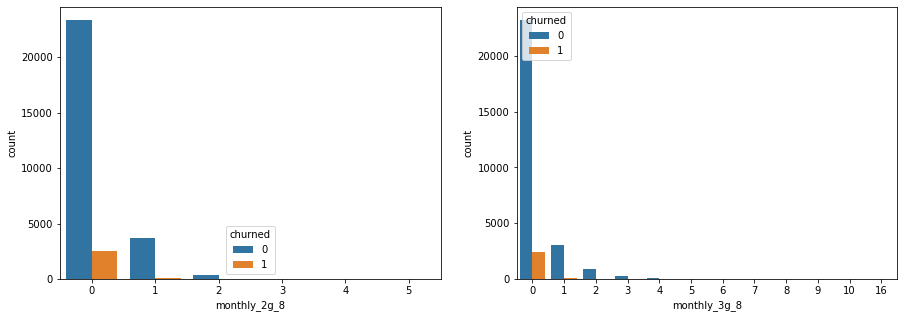

In [70]:
# Countplot for MONTHLY service schemes
for i,j in [('monthly_2g_6','monthly_3g_6'),('monthly_2g_7','monthly_3g_7'),('monthly_2g_8','monthly_3g_8')]:
    plt.figure(figsize = [15,5]) 
    plt.subplot(1,2,1)
    sns.countplot(high_value[i], hue = high_value['churned'])
    plt.subplot(1,2,2)
    sns.countplot(high_value[j], hue = high_value['churned'])
    plt.show()

Inference:
- There are plenty of users who does not have any service schemes with validity equivalent to a month
- The user pattern for service schemes with validity equivalent to a month doesn't seem to be varrying much between good phase and action phase

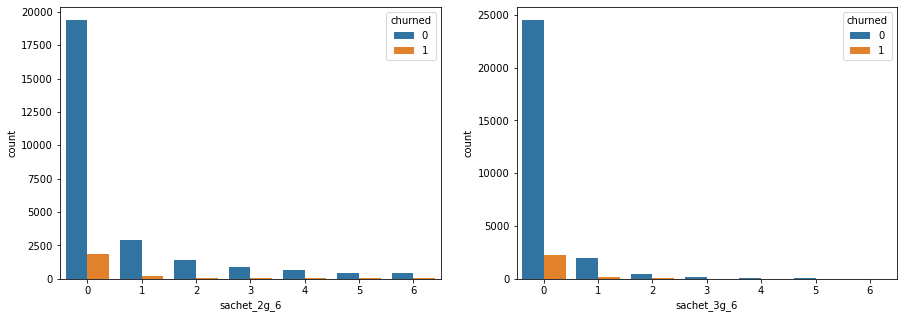

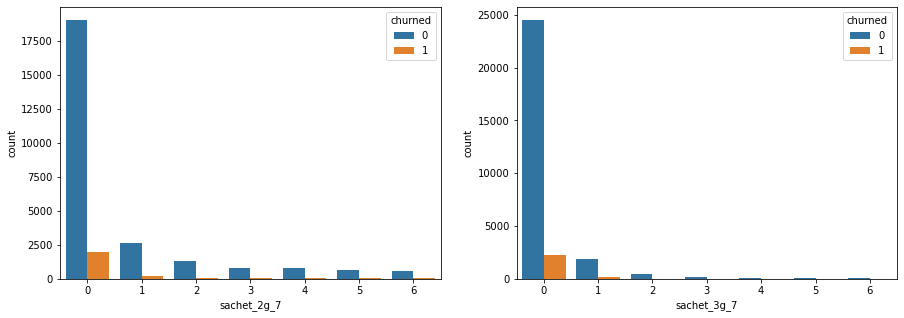

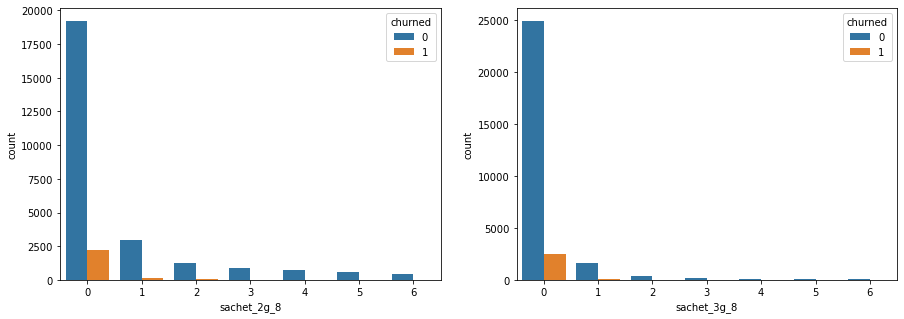

In [71]:
# Countplot for SACHET service schemes 
for i,j in [('sachet_2g_6','sachet_3g_6'),('sachet_2g_7','sachet_3g_7'),('sachet_2g_8','sachet_3g_8')]:
    plt.figure(figsize = [15,5]) 
    plt.subplot(1,2,1)
    sns.countplot(high_value[high_value[i]<7][i], hue = high_value['churned'])
    plt.subplot(1,2,2)
    sns.countplot(high_value[high_value[j]<7][j], hue = high_value['churned'])
    plt.show()

Inference:
- There are plenty of users who does not have any service schemes with validity smaller than a month
- The user pattern for service schemes with validity smaller than a month doesn't seem to be varrying much between good phase and action phase

In [72]:
# Correlation matrix for all the variables with churn
high_value.corr()['churned'].sort_values(ascending=False)

churned                  1.000000
arpu_6                   0.064231
total_rech_num_6         0.052916
arpu_2g_6                0.020232
last_day_rch_amt_6       0.017305
arpu_3g_6                0.016161
sachet_3g_6              0.012436
monthly_3g_6             0.008029
sachet_3g_7              0.000044
mou                     -0.002083
sachet_2g_6             -0.008108
arpu_2g_7               -0.010034
arpu_3g_7               -0.013357
avg_rech_6_7            -0.014494
total_rech_num_7        -0.019224
monthly_3g_7            -0.021348
og                      -0.025031
arpu_7                  -0.033030
vbc_3g_6                -0.033182
sachet_3g_8             -0.034931
last_day_rch_amt_7      -0.039664
sachet_2g_7             -0.039979
vol                     -0.054428
vbc_3g_7                -0.057214
monthly_2g_6            -0.057557
monthly_3g_8            -0.059496
arpu_2g_8               -0.061524
arpu_3g_8               -0.062164
max_rech_amt            -0.065487
total_rech_amt

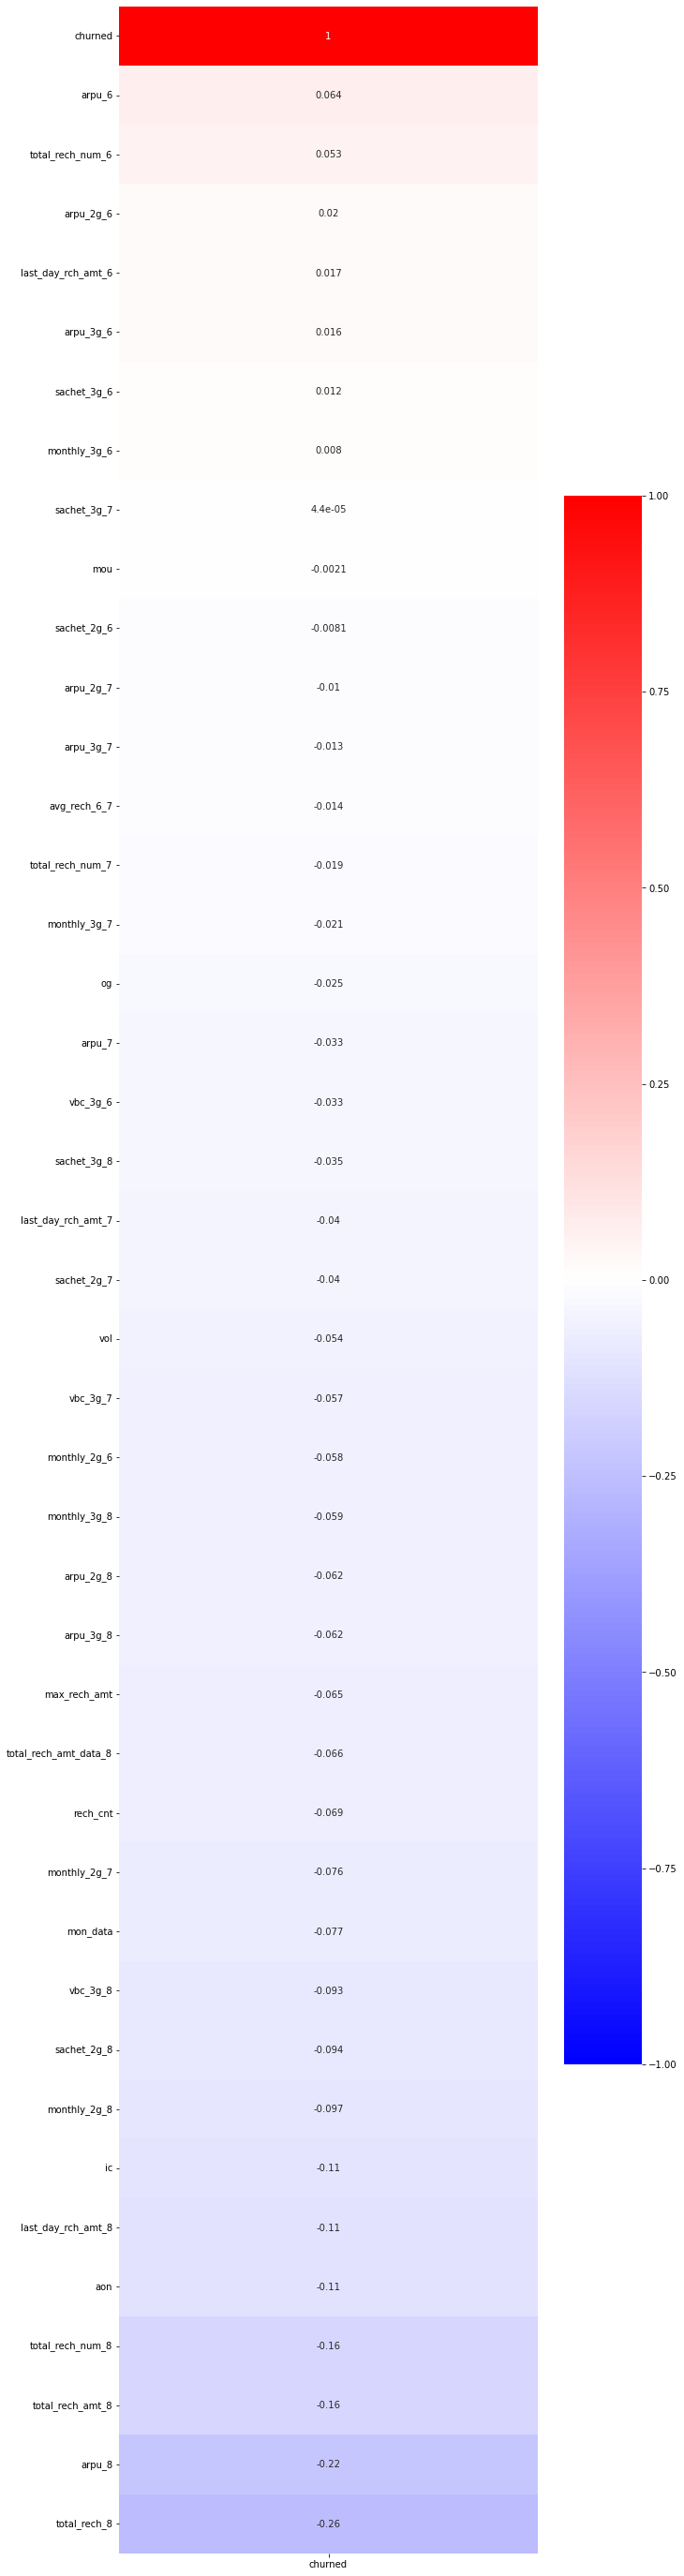

In [73]:
# heatmap for correlation with all the varibales with churned (target) column
plt.figure(figsize=(10,50))
corr_matrix = high_value.corr()
data=pd.DataFrame(corr_matrix["churned"].sort_values(ascending=False)); ax = sns.heatmap(data, annot=True, vmin=-1, vmax=1, cmap='bwr')

None of the feature seems to be highly linearly correlated to target feature 'churned'

In [74]:
high_value.shape                                           # reviewing the rows and columns count for the dataset

(30001, 43)

Currently there are 43 features remaining

In [75]:
# highly correlated features
corr = high_value.corr()
corr = corr.stack()
high_corr_value = corr[((corr > 0.6) | (corr < -0.6)) & (corr != 1)]
high_corr_value.sort_values(ascending = False).head(60)

og                mou                 0.994849
mou               og                  0.994849
arpu_2g_6         arpu_3g_6           0.940079
arpu_3g_6         arpu_2g_6           0.940079
arpu_3g_8         arpu_2g_8           0.937701
arpu_2g_8         arpu_3g_8           0.937701
arpu_2g_7         arpu_3g_7           0.936447
arpu_3g_7         arpu_2g_7           0.936447
monthly_3g_8      arpu_2g_8           0.854830
arpu_2g_8         monthly_3g_8        0.854830
monthly_3g_7      arpu_2g_7           0.850982
arpu_2g_7         monthly_3g_7        0.850982
monthly_3g_6      arpu_2g_6           0.844105
arpu_2g_6         monthly_3g_6        0.844105
monthly_3g_8      arpu_3g_8           0.838083
arpu_3g_8         monthly_3g_8        0.838083
monthly_3g_7      arpu_3g_7           0.836729
arpu_3g_7         monthly_3g_7        0.836729
arpu_3g_6         monthly_3g_6        0.827427
monthly_3g_6      arpu_3g_6           0.827427
sachet_2g_7       rech_cnt            0.823195
rech_cnt     

There are some hghly correlated features are remaining. Some of these columns can be dropped, however PCA can handle some amount of collinearity.

# Step 5: Model Building
- Test Train data split
- Scaling
- Handling data imbalance
- PCA
- Classification Model Building

In [76]:
# Test Train Split
X = high_value.drop('churned', axis = 1)
y = high_value[['churned']]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, stratify = y, random_state = 100)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(21000, 42)
(21000, 1)
(9001, 42)
(9001, 1)


In [77]:
X_train.head()                                              # first 5 rows of the train dataset

,arpu_6,arpu_7,arpu_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,...,total_rech_amt_data_8,total_rech_8,avg_rech_6_7,ic,og,vol,mou,rech_cnt,mon_data,max_rech_amt
18013,405.187,576.487,228.196,10,9,7,166,110,86,10,...,0.0,166.0,537.0,3267.07,8549.46,0.00,2850.53,0.0,0,257.0
25031,652.632,1441.922,961.915,6,5,4,3321,252,252,252,...,252.0,2000.0,1700.0,5922.05,8257.59,3179.87,2881.08,5.0,4,7008.0
10170,363.947,211.934,552.844,4,2,3,650,500,250,400,...,0.0,650.0,495.0,3815.26,2559.41,0.00,877.18,0.0,0,1150.0
4902,159.101,846.648,36.251,5,17,4,30,50,50,0,...,0.0,30.0,593.0,1167.55,4610.78,0.00,1548.29,0.0,0,190.0
23821,483.923,286.163,281.532,10,6,2,260,145,110,130,...,0.0,260.0,765.0,5047.05,2224.27,882.63,741.69,2.0,2,530.0


X_train = X_train.astype(np.int64)                        # converting all the data to int64 type in the X_train dataset

In [78]:
col = list(X_train.columns)                                 # Creating a list of all the columns of X_train
col

['arpu_6',
 'arpu_7',
 'arpu_8',
 'total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_amt_8',
 'last_day_rch_amt_6',
 'last_day_rch_amt_7',
 'last_day_rch_amt_8',
 'arpu_3g_6',
 'arpu_3g_7',
 'arpu_3g_8',
 'arpu_2g_6',
 'arpu_2g_7',
 'arpu_2g_8',
 'monthly_2g_6',
 'monthly_2g_7',
 'monthly_2g_8',
 'sachet_2g_6',
 'sachet_2g_7',
 'sachet_2g_8',
 'monthly_3g_6',
 'monthly_3g_7',
 'monthly_3g_8',
 'sachet_3g_6',
 'sachet_3g_7',
 'sachet_3g_8',
 'aon',
 'vbc_3g_8',
 'vbc_3g_7',
 'vbc_3g_6',
 'total_rech_amt_data_8',
 'total_rech_8',
 'avg_rech_6_7',
 'ic',
 'og',
 'vol',
 'mou',
 'rech_cnt',
 'mon_data',
 'max_rech_amt']

In [79]:
X_train.info()                                              # Reviweing the dataset information

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21000 entries, 18013 to 1331
Data columns (total 42 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   arpu_6                 21000 non-null  float64
 1   arpu_7                 21000 non-null  float64
 2   arpu_8                 21000 non-null  float64
 3   total_rech_num_6       21000 non-null  int64  
 4   total_rech_num_7       21000 non-null  int64  
 5   total_rech_num_8       21000 non-null  int64  
 6   total_rech_amt_8       21000 non-null  int64  
 7   last_day_rch_amt_6     21000 non-null  int64  
 8   last_day_rch_amt_7     21000 non-null  int64  
 9   last_day_rch_amt_8     21000 non-null  int64  
 10  arpu_3g_6              21000 non-null  float64
 11  arpu_3g_7              21000 non-null  float64
 12  arpu_3g_8              21000 non-null  float64
 13  arpu_2g_6              21000 non-null  float64
 14  arpu_2g_7              21000 non-null  float64
 15 

In [80]:
# Scaling: Scaling using standard scaling
scaler = StandardScaler()
X_train[col] = scaler.fit_transform(X_train[col])
X_test[col] = scaler.transform(X_test[col])

In [81]:
X_train                                                 # The X_train dataset after scaling

,arpu_6,arpu_7,arpu_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,...,total_rech_amt_data_8,total_rech_8,avg_rech_6_7,ic,og,vol,mou,rech_cnt,mon_data,max_rech_amt
18013,-0.404115,0.105401,-0.732075,-0.196359,-0.289297,-0.320984,-0.742129,0.061195,-0.100125,-0.560578,...,-0.274616,-1.100416,-0.989225,0.226393,0.553759,-0.552232,0.517790,-0.661904,-0.627602,-0.763471
25031,0.342560,2.706709,1.327930,-0.628110,-0.717531,-0.646096,4.865774,1.031163,1.066726,1.085668,...,-0.124913,1.968687,1.859445,1.133582,0.501975,0.685500,0.533902,-0.017820,1.534678,10.101764
10170,-0.528559,-0.990365,0.179413,-0.843985,-1.038706,-0.754466,0.118164,2.725193,1.052667,2.092464,...,-0.274616,-0.290467,-1.092101,0.413706,-0.509010,-0.552232,-0.522947,-0.661904,-0.627602,0.673746
4902,-1.146690,0.917446,-1.270984,-0.736047,0.567170,-0.646096,-0.983865,-0.348651,-0.353176,-0.628605,...,-0.274616,-1.328005,-0.852058,-0.491000,-0.145051,-0.552232,-0.169006,-0.661904,-0.627602,-0.871303
23821,-0.166526,-0.767249,-0.582328,-0.196359,-0.610472,-0.862837,-0.575047,0.300271,0.068577,0.255743,...,-0.274616,-0.943112,-0.430759,0.834600,-0.568471,-0.208678,-0.594404,-0.404270,0.453538,-0.324098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23175,1.631077,-0.839148,-1.372763,0.451267,-0.717531,-1.079579,-1.037188,-0.212036,0.138869,-0.628605,...,-0.274616,-1.378208,-0.265423,-0.495910,-0.095293,-0.552232,0.062204,-0.661904,-0.627602,-0.670125
15409,-0.884345,-0.252209,0.032895,-0.628110,-0.717531,-0.754466,0.125274,-0.348651,-0.704637,1.085668,...,0.324195,1.403062,-0.717340,0.717194,-0.659290,0.261197,-0.684536,-0.146637,1.534678,1.043914
6351,1.055107,1.910189,2.629756,-0.736047,-0.503414,0.437611,1.671669,1.700579,3.161433,0.323769,...,-0.274616,1.172126,0.649434,-0.728066,4.643388,-0.552232,4.566835,-0.661904,-0.627602,0.598103
8687,1.444841,2.750368,2.277082,0.235391,0.995403,1.304577,2.055601,0.061195,-0.353176,0.051662,...,-0.274616,1.533591,1.638998,0.035625,2.780954,-0.552232,2.724224,-0.661904,-0.627602,-0.581606


In [82]:
# Using SMOTE for handling bata imbalance
smt = SMOTE(random_state=45)
X_resampled_smt, y_resampled_smt = smt.fit_resample(X_train, y_train)
X_resampled_smt.shape

(38446, 42)

In [83]:
y_train['churned'].value_counts()                          # y_train dataset imbalance

0    19223
1     1777
Name: churned, dtype: int64

In [84]:
y_resampled_smt['churned'].value_counts()                 # y_resampled_smt dataset imbalance

0    19223
1    19223
Name: churned, dtype: int64

Using SMOTE, the dataset is balanced now

In [85]:
# Performing PCA 
pca = PCA(random_state=42)
pca.fit(X_resampled_smt)

PCA(random_state=42)

In [86]:
pca.components_                                          # the components that have been formed after applying the pca

array([[ 3.95053133e-02,  8.59713882e-02,  1.33711039e-01, ...,
         6.26237595e-02,  2.48726269e-01,  2.62273926e-01],
       [ 2.83137862e-01,  3.64617009e-01,  3.42439459e-01, ...,
        -7.06369928e-02, -6.97421185e-02,  1.41592763e-02],
       [-9.86435266e-02, -5.15893610e-02, -4.55283381e-03, ...,
         3.98557696e-01, -5.19510945e-02, -1.50442500e-01],
       ...,
       [-1.56392218e-02,  8.45192745e-04,  9.56412333e-03, ...,
         2.74107614e-03,  8.15795208e-04, -6.57244143e-03],
       [ 1.41811841e-16, -1.86982545e-16, -1.66625924e-16, ...,
         4.20267208e-01,  6.75043304e-01,  7.13371623e-17],
       [-0.00000000e+00,  4.17909325e-17,  1.58329812e-17, ...,
         7.30414515e-01, -4.65371031e-01,  6.03603004e-17]])

In [87]:
pca.explained_variance_ratio_                           # The variance from each of the components of PCA model

array([2.33652026e-01, 1.36054179e-01, 1.09031434e-01, 6.72495549e-02,
       4.76329478e-02, 4.40515435e-02, 4.18495876e-02, 3.21306422e-02,
       2.62712368e-02, 2.41084917e-02, 2.33985299e-02, 2.12616767e-02,
       1.85415156e-02, 1.76270636e-02, 1.56007781e-02, 1.48322560e-02,
       1.27313112e-02, 1.17404747e-02, 1.14058749e-02, 1.04805745e-02,
       9.51268841e-03, 8.80634142e-03, 7.99923397e-03, 6.94922794e-03,
       5.77476586e-03, 5.54861044e-03, 5.11511656e-03, 4.84126962e-03,
       4.52492971e-03, 3.77604672e-03, 3.04173034e-03, 2.86279053e-03,
       2.54156826e-03, 2.23024718e-03, 1.76188822e-03, 1.68695342e-03,
       1.23045042e-03, 1.07850788e-03, 8.96661635e-04, 1.69273167e-04,
       4.60797371e-32, 1.80837324e-33])

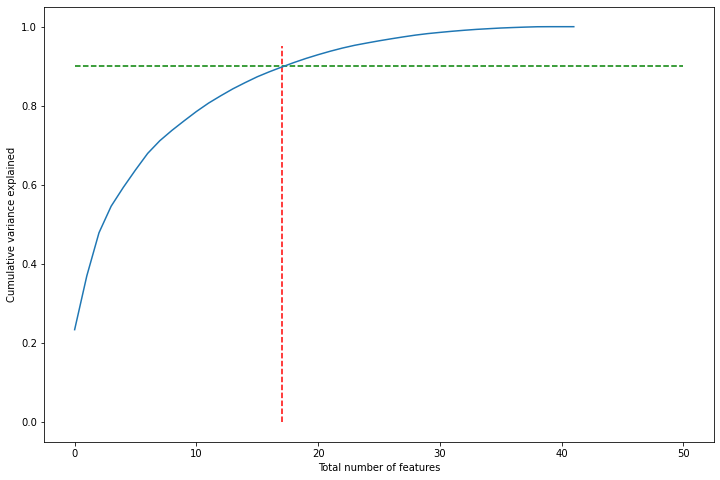

In [88]:
# Making a scree plit for explained variance
var_cumu = np.cumsum(pca.explained_variance_ratio_)
fig = plt.figure(figsize=[12,8])
plt.vlines(x=17, ymax=0.95, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.90, xmax=50, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.xlabel('Total number of features')
plt.ylabel("Cumulative variance explained")
plt.show()

Optimum number of features seems to be 17 for expalining 90% variance

#### PCA with 17 features

In [89]:
pca_final = IncrementalPCA(n_components=17)                      # Perform PCA with 17 components

In [90]:
df_pca_train = pca_final.fit_transform(X_resampled_smt)          # PCA train data fitting

In [91]:
df_pca_train                                                     # Look at the PCA_train dataset

array([[-1.79664411, -0.03805849, -0.99984956, ...,  0.23382278,
        -0.01908035, -0.02673773],
       [ 9.17986601,  3.8041288 , -2.2046126 , ..., -1.17538438,
        -0.38241122, -0.17285903],
       [-0.11507573, -0.35715697, -2.40261203, ..., -0.41309309,
         0.21770592,  0.08306762],
       ...,
       [-0.78279355,  3.67634184, -0.61999   , ..., -0.43226074,
         0.14210116,  0.34585253],
       [-2.00266711, -2.84273504,  0.92989837, ..., -0.14066302,
        -0.18409138, -0.15022438],
       [ 2.91799886, -1.61467789, -2.29262186, ..., -0.7753656 ,
        -1.89528732, -0.3109579 ]])

In [92]:
df_pca_train.shape                                               # PCA train dataset shape

(38446, 17)

In [93]:
# Applying the transformation on the test set
df_pca_test = pca_final.transform(X_test)
df_pca_test.shape

(9001, 17)

#### Model 1: Logistic Regression

In [94]:
# logistic regression with above PCA model
learner_pca = LogisticRegression()

In [95]:
model_pca = learner_pca.fit(df_pca_train, y_resampled_smt)      # model_pca for predictions

In [96]:
# Making predictions on the train set
pred_probs_train = model_pca.predict_proba(df_pca_train).round()

Making Prediction

In [97]:
# Making predictions on the test set
pred_probs_test = model_pca.predict_proba(df_pca_test).round()
pred_probs_test

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [0., 1.]])

Model Evaluation

In [98]:
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test[:,1]))   #ROC_AUC score

'0.76'

In [99]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_resampled_smt, pred_probs_train[:,1])
print(confusion)

[[14811  4412]
 [ 3768 15455]]


In [100]:
# Accuracy Score
accuracy_score(y_resampled_smt, pred_probs_train[:,1])

0.7872340425531915

In [101]:
# Recall calculation train
recall_score(y_resampled_smt, pred_probs_train[:,1])

0.8039848098631848

In [102]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, pred_probs_test[:,1])
print(confusion)

[[6279 1960]
 [ 181  581]]


In [103]:
# Accuracy Score
accuracy_score(y_test, pred_probs_test[:,1])

0.7621375402733029

In [104]:
# Recall calculation test
recall_score(y_test, pred_probs_test[:,1])

0.7624671916010499

The recall score for train set is **80.4%**, for test it is **76.3%**

#### Here Recall metric is used instead of Accuracy
- Recall is used to identify the positive labels correcly
- **It is more important to identify churners than the non-churners accurately**
- Hence it is important to use Recall here

#### Model 2: Random Forest With PCA (Random hyperparameters selection)

#### Performing Random Forest on the PCA

In [105]:
rf = RandomForestClassifier(random_state=42, max_depth=3, n_estimators=10, oob_score=True, n_jobs=-1)

In [106]:
rf.fit(df_pca_train, y_resampled_smt)                   # Random forest with random hyper-parameters

RandomForestClassifier(max_depth=3, n_estimators=10, n_jobs=-1, oob_score=True,
                       random_state=42)

In [107]:
rf.oob_score_                                                     # oob_score

0.7468137127399469

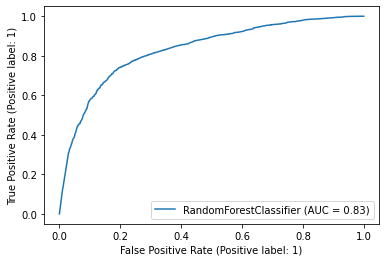

In [108]:
# Plotting the ROC Curve
RocCurveDisplay.from_estimator(rf, df_pca_train, y_resampled_smt)
plt.show()

In [109]:
# Hyper-parameter tuning
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [110]:
# Create the parameter grid based on the results of random search 
params = {
    'min_samples_leaf': [5, 10, 20],
    'min_samples_split': [10, 20, 50],
    'n_estimators': [200, 250, 300]
}

In [111]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=classifier_rf, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [112]:
grid_search.fit(df_pca_train, y_resampled_smt)                 # grid search for several parameters for Random Forest

Fitting 4 folds for each of 27 candidates, totalling 108 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'min_samples_leaf': [5, 10, 20],
                         'min_samples_split': [10, 20, 50],
                         'n_estimators': [200, 250, 300]},
             scoring='accuracy', verbose=1)

In [113]:
grid_search.best_score_                                        # grid_search best score

0.9155177878049553

In [114]:
grid_search.best_params_                                       # getting the best parameters for Random Forest

{'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 300}

**Model Hyperparameters Tuning:**
- Model hyperparameters tuning was done using parameters like 'min_samples_leaf', 'min_samples_split', 'n_estimators'
- The tuning was done using GridSearchCV method
- Based on the outcome, the Random Forest Classifier is modeled. 'max_depth' is not used for tuning as the intention was to keep the depth on lower side to avaoid overfitting.

#### Model 3: Random Forest with Optimized hyperparameters varying depth of trees

In [115]:
# Random Forest Classifier
rfc_model = RandomForestClassifier(
                             max_depth=5,
                             min_samples_leaf=5, 
                             min_samples_split=10,
                             n_estimators=300)

In [116]:
rfc_model.fit(df_pca_train, y_resampled_smt)                    # Random forest with optimized hyper-parameters

RandomForestClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=10,
                       n_estimators=300)

Model Evaluation

In [117]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_resampled_smt, rfc_model.predict(df_pca_train))
print(confusion)

[[15886  3337]
 [ 4304 14919]]


In [118]:
recall_score(y_resampled_smt, rfc_model.predict(df_pca_train))  # Recall socre on the train dataset

0.7761015450241898

With the optimized Random Forest model the recall score is 77.5%

**Here Recall metric is used instead of Accuracy**
- Recall is used to identify the positive labels correcly
- It is more important to identify churners than the non-churners accurately
- Hence it is important to use Recall here

In [119]:
accuracy_score(y_resampled_smt, rfc_model.predict(df_pca_train))  # Accuracy Score on the train dataset

0.801253706497425

In [120]:
# Prediction on the test sample
pred_probs_test_rf =  rfc_model.predict_proba(df_pca_test).round()
pred_probs_test_rf

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [0., 1.]])

In [121]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, pred_probs_test_rf[:,1])
print(confusion)

[[6749 1490]
 [ 218  544]]


In [122]:
recall_score(y_test, pred_probs_test_rf[:,1])                    # Recall socre on the test dataset

0.7139107611548556

The recall score on the train dataset is **77.5%** and test dataset is **71.8%**

**Here Recall metric is used instead of Accuracy**
- Recall is used to identify the positive labels correcly
- It is more important to identify churners than the non-churners accurately
- Hence it is important to use Recall here

In [123]:
accuracy_score(y_test, pred_probs_test_rf[:,1])                 # Accuracy Score on the test dataset

0.8102433062993001

#### Model 4: Random Forest with Optimized hyperparameters and Bootstraping

In [124]:
# Random Forest Classifier
rfc_model1 = RandomForestClassifier(bootstrap=True,
                             max_depth=5,
                             min_samples_leaf=5, 
                             min_samples_split=10,
                             n_estimators=300)

In [125]:
rfc_model1.fit(df_pca_train, y_resampled_smt)                    # Random forest with optimized hyper-parameters

RandomForestClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=10,
                       n_estimators=300)

Model Evaluation

In [126]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_resampled_smt, rfc_model1.predict(df_pca_train))
print(confusion)

[[15901  3322]
 [ 4293 14930]]


In [127]:
recall_score(y_resampled_smt, rfc_model1.predict(df_pca_train))  # Recall socre on the train dataset

0.7766737762055871

With the optimized Random Forest model the recall score is 77.6%

**Here Recall metric is used instead of Accuracy**
- Recall is used to identify the positive labels correcly
- It is more important to identify churners than the non-churners accurately
- Hence it is important to use Recall here

In [128]:
accuracy_score(y_resampled_smt, rfc_model.predict(df_pca_train))  # Accuracy Score on the train dataset

0.801253706497425

In [129]:
# Prediction on the test sample
pred_probs_test_rf =  rfc_model1.predict_proba(df_pca_test).round()
pred_probs_test_rf

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [0., 1.]])

In [130]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, pred_probs_test_rf[:,1])
print(confusion)

[[6772 1467]
 [ 214  548]]


In [131]:
recall_score(y_test, pred_probs_test_rf[:,1])                    # Recall socre on the test dataset

0.7191601049868767

The recall score on the train dataset is **77.6%** test dataset is **71.7%**

**Here Recall metric is used instead of Accuracy**
- Recall is used to identify the positive labels correcly
- It is more important to identify churners than the non-churners accurately
- Hence it is important to use Recall here

In [132]:
accuracy_score(y_test, pred_probs_test_rf[:,1])                 # Accuracy Score on the test dataset

0.8132429730029996

#### Model 5: Random Forest with Optimized hyperparameters varying depth of trees

In [133]:
# Random Forest Classifier
rfc_model2 = RandomForestClassifier(bootstrap=True,
                             max_depth=7,
                             min_samples_leaf=5, 
                             min_samples_split=10,
                             n_estimators=300)

In [134]:
rfc_model2.fit(df_pca_train, y_resampled_smt)                    # Random forest with optimized hyper-parameters

RandomForestClassifier(max_depth=7, min_samples_leaf=5, min_samples_split=10,
                       n_estimators=300)

Model Evaluation

In [135]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_resampled_smt, rfc_model2.predict(df_pca_train))
print(confusion)

[[16478  2745]
 [ 3627 15596]]


In [136]:
recall_score(y_resampled_smt, rfc_model2.predict(df_pca_train))  # Recall socre on the train dataset

0.8113197731883681

With the optimized Random Forest model the recall score is 81.2%

**Here Recall metric is used instead of Accuracy**
- Recall is used to identify the positive labels correcly
- It is more important to identify churners than the non-churners accurately
- Hence it is important to use Recall here

In [137]:
accuracy_score(y_resampled_smt, rfc_model2.predict(df_pca_train))  # Accuracy Score on the train dataset

0.8342610414607502

In [138]:
# Prediction on the test sample
pred_probs_test_rf =  rfc_model2.predict_proba(df_pca_test).round()
pred_probs_test_rf

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [0., 1.]])

In [139]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, pred_probs_test_rf[:,1])
print(confusion)

[[6974 1265]
 [ 219  543]]


In [140]:
recall_score(y_test, pred_probs_test_rf[:,1])                    # Recall socre on the test dataset

0.7125984251968503

The recall score on the train dataset is **81.2%** and test dataset in **70.9%**

**Here Recall metric is used instead of Accuracy**
- Recall is used to identify the positive labels correcly
- It is more important to identify churners than the non-churners accurately
- Hence it is important to use Recall here

In [141]:
accuracy_score(y_test, pred_probs_test_rf[:,1])                 # Accuracy Score on the test dataset

0.8351294300633263

#### Model 6: Random Forest with Optimized hyperparameters varying depth of trees

In [142]:
# Random Forest Classifier
rfc_model3 = RandomForestClassifier(bootstrap=True,
                             max_depth=3,
                             min_samples_leaf=5, 
                             min_samples_split=10,
                             n_estimators=300)

In [143]:
rfc_model3.fit(df_pca_train, y_resampled_smt)                    # Random forest with optimized hyper-parameters

RandomForestClassifier(max_depth=3, min_samples_leaf=5, min_samples_split=10,
                       n_estimators=300)

Model Evaluation

In [144]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_resampled_smt, rfc_model3.predict(df_pca_train))
print(confusion)

[[15099  4124]
 [ 4437 14786]]


In [145]:
recall_score(y_resampled_smt, rfc_model3.predict(df_pca_train))  # Recall socre on the train dataset

0.7691827498309317

With the optimized Random Forest model the recall score is 76.8%

**Here Recall metric is used instead of Accuracy**
- Recall is used to identify the positive labels correcly
- It is more important to identify churners than the non-churners accurately
- Hence it is important to use Recall here

In [146]:
accuracy_score(y_resampled_smt, rfc_model3.predict(df_pca_train))  # Accuracy Score on the train dataset

0.7773240389117203

In [147]:
# Prediction on the test sample
pred_probs_test_rf =  rfc_model3.predict_proba(df_pca_test).round()
pred_probs_test_rf

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       ...,
       [0., 1.],
       [1., 0.],
       [0., 1.]])

In [148]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, pred_probs_test_rf[:,1])
print(confusion)

[[6423 1816]
 [ 208  554]]


In [149]:
recall_score(y_test, pred_probs_test_rf[:,1])                    # Recall socre on the test dataset

0.7270341207349081

The recall score on the train dataset is **76.8%** and test dataset in **72.4%**

**Here Recall metric is used instead of Accuracy**
- Recall is used to identify the positive labels correcly
- It is more important to identify churners than the non-churners accurately
- Hence it is important to use Recall here

In [150]:
accuracy_score(y_test, pred_probs_test_rf[:,1])                 # Accuracy Score on the test dataset

0.7751360959893345

**Based on above all the models, model 1 which was logistic regression using PCA seems to be best model as all the other models have lesser recall score.**

#### Here Recall metric is used instead of Accuracy

 * Recall is used to identify the positive labels correcly
 * **It is more important to identify churners than the non-churners accurately**
 * Hence it is important to use Recall here

# Step 6: Model Building For Feature Importance
- Genrate Random Forest model with random hyper-parameters
- Hyper-parameter tuning
- Estimator the features with importance

In [151]:
# For feature importance, doing Random Forest without PCA, for interpratation (taking random parameters)
rf1 = RandomForestClassifier(random_state=42, max_depth=3, n_estimators=10, oob_score=True)

In [152]:
rf1.fit(X_resampled_smt, y_resampled_smt)                 # fitting to the new random forest model for interpretation

RandomForestClassifier(max_depth=3, n_estimators=10, oob_score=True,
                       random_state=42)

In [153]:
rf1.oob_score_                                             # oob_score

0.7697029599958383

**Interpretation:** Here the number of correctly predicted rows from the out-of-bag sample is about 78%

In [154]:
# Grid search for hyper-parameter tuning
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [155]:
# Create the parameter grid based on the results of random search 
params = {
    'min_samples_leaf': [5, 10, 20],
    'min_samples_split': [10, 20, 50],
    'n_estimators': [200, 250, 300]
}

In [156]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=classifier_rf, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [157]:
grid_search.fit(X_resampled_smt, y_resampled_smt)           # grid search for several parameters for Random Forest

Fitting 4 folds for each of 27 candidates, totalling 108 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'min_samples_leaf': [5, 10, 20],
                         'min_samples_split': [10, 20, 50],
                         'n_estimators': [200, 250, 300]},
             scoring='accuracy', verbose=1)

In [158]:
rf_best = grid_search.best_estimator_                      # best random forest model based on the grid search best estimator

In [159]:
rf_best                                                    # best random forest model

RandomForestClassifier(min_samples_leaf=5, min_samples_split=10,
                       n_estimators=200, n_jobs=-1, random_state=42)

In [160]:
# creating new random forest classifier based on the best model obtained from Grid Search
classifier_rf = RandomForestClassifier(
                                       random_state=42, 
                                       n_jobs=-1, 
                                       max_depth=5, 
                                       min_samples_leaf=5, 
                                       min_samples_split=10, 
                                       n_estimators=300, 
                                       oob_score=True)

In [161]:
classifier_rf.fit(X_resampled_smt, y_resampled_smt)         # fitting the optimized random forest model classifier

RandomForestClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=10,
                       n_estimators=300, n_jobs=-1, oob_score=True,
                       random_state=42)

In [162]:
classifier_rf.feature_importances_                          # Getting features of high importance in array form

array([0.00325978, 0.00603314, 0.13632077, 0.00957208, 0.00933804,
       0.08186402, 0.14704357, 0.00260928, 0.00612795, 0.10076868,
       0.00219744, 0.00204039, 0.00749141, 0.00312785, 0.00255813,
       0.00411193, 0.00427199, 0.00469976, 0.02148023, 0.00362814,
       0.00457236, 0.03702451, 0.00225075, 0.00262697, 0.00179834,
       0.00047336, 0.00051529, 0.00109914, 0.01708735, 0.02330041,
       0.00145417, 0.00120888, 0.06067367, 0.18568997, 0.00184183,
       0.03101007, 0.00857222, 0.00350931, 0.01935674, 0.01651057,
       0.00508267, 0.0157968 ])

In [163]:
# Creating database for important features for predictions
imp_df = pd.DataFrame({
    "Varname": X_resampled_smt.columns,
    "Imp": classifier_rf.feature_importances_
})

In [164]:
imp_df = imp_df.sort_values(by = 'Imp', ascending=False)             # For identification of important predictors

In [165]:
imp_df.reset_index(drop=True, inplace=True)                          # resetting index

In [166]:
imp_df                                                               # important variables dataframe

,Varname,Imp
0,total_rech_8,0.185690
1,total_rech_amt_8,0.147044
2,arpu_8,0.136321
3,last_day_rch_amt_8,0.100769
4,total_rech_num_8,0.081864
5,total_rech_amt_data_8,0.060674
6,sachet_2g_8,0.037025
7,ic,0.031010
8,vbc_3g_8,0.023300
9,monthly_2g_8,0.021480


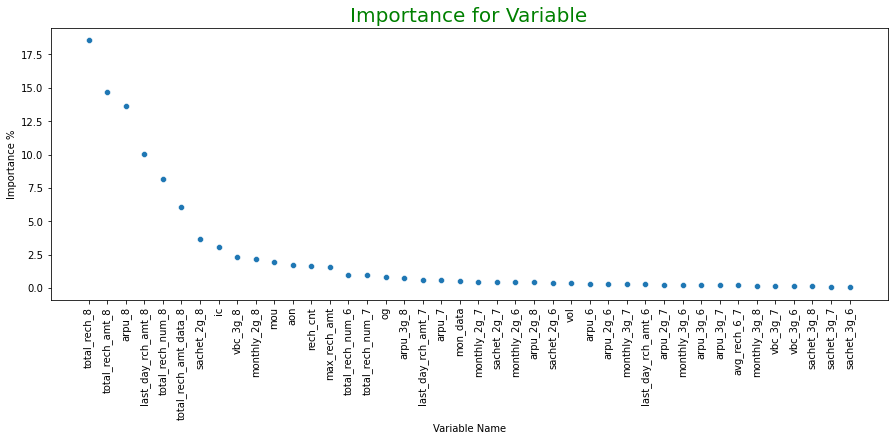

In [167]:
# plotting scatterplot for variable names and their importance
plt.figure(figsize = [15,5])
sns.scatterplot(x = 'Varname', y = imp_df['Imp']*100, data = imp_df)
plt.title('Importance for Variable', fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.xticks(rotation = 90)
plt.ylabel('Importance %')
plt.xlabel('Variable Name')
plt.show()

Some of the highly important variables are:
- total_rech_8
- total_rech_amt_8
- arpu_8
- last_day_rch_amt_8
- total_rech_num_8
- total_rech_amt_data_8
- sachet_2g_8
- ic
- vbc_3g_8
- monthly_2g_8
- mou

Here ic is the list of columns representing incoming columns like *'roam_ic_mou_6', 'loc_ic_t2t_mou_6', 'loc_ic_mou_6', 'std_ic_mou_6', 'ic_others_6'* etc.

# Step 7: Observations, Summary and Recommendations

## Observations:
- For 'good' phase, churned and non-churned customer generated somewhat equal revenue (considering median values)
- For 'action' phase however, churned customers seem to drop the uses and hence the revenue generated is lesser
- For all the phases, the non-churned customers seem to generate similar revenue


- For all the phases, the non-churned customers seem to have similar minutes of usage for onnet and offnet
- For churned customers, there is slow decline which can be observed in both offnet and onnet
- This decline can be obsevred from month 6 to month 7 and then month 7 to month 8
- This indicates that users usually started experiencing issues and slowly reduced usage. The action phase would have been a good time to take actions to prevent customer churning


- For all the phases, the non-churned customers seem to have similar minutes of usage for outgoing and incoming
- For churned customers, there is slow decline which can be observed in both outgoing and incoming
- This decline can be obsevred from month 6 to month 7 and then month 7 to month 8
- This indicates that users usually started experiencing issues and slowly reduced usage. The action phase would have been a good time to take actions to prevent customer churning
- In general the outgoing calls minutes usage are higher than incoming call minutes usage


- There is slighlty more user density of customer who churned with lower Age on network
- While customers with higher Age on network seems to be slighly higher in numer (density)
- This is a predictable behavior as the customers who have been there for long time with the network may seem to build trust on the service provider and might want to give more chances to the network
- Company should provide some privilege packages to these customers who are loyal


- There is no much difference in the recharge pattern based on churned and non-churned classes, with slight lesser average recarge amount for churned class


- Churned class clearly shows significant drop in the total recharge amount for month 8
- This could be used as indicator of churner and could be used for taking appropriate action


- 3g data uses are higher than 2g data uses
- Churned class clearly shows significant drop in 2g and 3g data uses from good phase to action phase
- Non-churned class shows similar uses behaviour in 2g and 3g data uses from good phase and action phase
- This could be used as indicator of churner and could be used for taking appropriate action in the begining of action phase


- There are plenty of users who does not have any service schemes with validity smaller than a month
- The user pattern for service schemes with validity smaller than a month doesn't seem to be varrying much between good phase and action phase

## Summary:
-The recall score for train set is 80.4%, for test it is 76.3% for Logistic Regression with PCA

-With the optimized Random Forest model the recall score is 76.8% for Train and The recall score on the test dataset in 72.4%

**Here Recall metric is used instead of Accuracy**

 - Recall is used to identify the positive labels correcly
 - It is more important to identify churners than the non-churners accurately
 - Hence it is important to use Recall here


**The confusion matrix is as below:**
- For Train dataset with Logistic Regression PCA (model 1):<br>
[[14811 &nbsp; 4412]<br>
 [ 3768 &nbsp; 15455]]
<br>

- For Test dataset with Logistic Regression PCA (model 1):<br>
[[6279 &nbsp; 1960]<br>
 [ 181 &nbsp; 581]]
<br>

- For Train Dataset with Optimized Random Forest Train Dataset (best model):<br>
[[15129 &nbsp; 4094]<br>
 [ 4460 &nbsp; 14763]]
<br>

- For TestDataset with Optimized Random Forest Train Dataset best model):<br>
[[6450 &nbsp; 1789]<br>
 [ 210 &nbsp; 552]]
 
 
 - Based on the Recall study, **Model1: the Logistic Regression model** using PCA seems to be relatively better than Random Forest model done using EDA, as the recall score of Random Forest model is relatively lesser.
   * Based on this observation, we can go with model 1, i.e. logistic regression using PCA
   * The recall_score of the best model is for train set is **80.4%**, for test it is **76.3%**
   * The Random Forest model can also be used, however they are slightly lower on recall scores and also have some tendency to overfit as comparision to Logistic Regression model

## Recommendations of Strategies:
- During action phase, customers who are doing less recharges should be provided some good offers on recharges like cashbacks or discounts
  * Based on the revenue analysis perfromed during EDA of good phase and action phase
- Customers sould be observed for onnet and offnet uses, and in case if there is any decline observed, company should provide service at discounted rates for these customer. Company should not wait for action phase.
  * Based on the onnet and offnet mou (minutes of usage)
- Reduction in outgoing and incoming call is also an indicator of a potential churn. Company should check with customers having reduced calls than previous month as this is likely an indicator of poor network. Company should take action to improve network if needed.
  * Based on the mou related to outgoing and incoming calls
- As outgoing calls for users are higher than the incoming calls and outgoing call likely generates more revenue, company should provide some added features or extra call minutes for every few minutes of outgoing call (like for every 100 minutes of outgoing call, the customer should be provided 10 minutes of free calling).
  * Based on the mou related to outgoing and incoming calls
- For customer retention, company should provide some privilege packages offers to the customers who have been for long time with company. This will encourage other customers also to stay longer with the company.
  * Based on AON (Age on network) analysis performed in EDA
- For bigger recharge packages, company should provide some extra calling minutes / SMS packs or data packs as free, to encourage customers to recharge with bigger packs.
  * Based on the recharge patterns of customer observed during EDA
- If company observes that there is a decrease in recharge number in action month, company should take an immediate action to figure out the reason of same, as this can be an indicator of potential churner customer.
  * Based on the total recharge amount analysis during good phase and action phase
- In case reduced data uses, the comapny should investigate the reason of same, as likely this can be related to poor 2g and 3g networks.
  * Based on the 3g and 2g data uses analysis
- Company should promote offers for customers to get service schemes with validity with atleast a month. 
  * Based on Service Schemes analysis performed during EDA

## Important Churn Indicators:

Based on the analysis, there are top few important churn indicators are identified:
- total_rech_8
- total_rech_amt_8
- arpu_8
- last_day_rch_amt_8
- total_rech_num_8
- total_rech_amt_data_8
- sachet_2g_8
- ic
- vbc_3g_8
- monthly_2g_8
- mou

*Here ic is the list of columns representing incoming columns like 'roam_ic_mou_6', 'loc_ic_t2t_mou_6', 'loc_ic_mou_6', 'std_ic_mou_6', 'ic_others_6' etc.